## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [432]:
# Add your package imports here
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import math
import streamlit
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [433]:
import pandas as pd

# CSV file path
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'

# Read CSV into a DataFrame
nacdata = pd.read_csv(csv_file_path)

# Directory path
directory_path = r'C:\Users\jimal\Downloads\NAC Data\2022_2023'


## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

In [434]:
directory_path = 'C:\\Users\\jimal\\Downloads\\NAC Data\\2022_2023'
excel_files = [file for file in os.listdir(directory_path) if file.endswith(".xlsx")]

# Initialize an empty list to store data
data = []

for file in excel_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_excel(file_path)
    data.append(df)

final = pd.concat(data, ignore_index=True)

NAC_FINAL_DATA = (
    'C:\\Users\\jimal\\OneDrive - BUas\\Desktop\\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\\Data lab\\GitHub\\DataLabPreparation\\NAC_FINAL_DATA.csv'
)
final.to_csv(NAC_FINAL_DATA, index=False)
print(NAC_FINAL_DATA)


C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\NAC_FINAL_DATA.csv


Checking the number of columns and rows with peers


In [435]:
print(final.shape)

(16535, 114)


How many numerical variables are present?

In [436]:
numerical_columns = final.select_dtypes(include=['int64', 'float64']).columns

# Printing the number of numerical variables
print(f"Number of numerical variables: {len(numerical_columns)}")


Number of numerical variables: 105


How many categorical variables are present?

In [437]:
print(f"Number of categorical variables: {len(final.select_dtypes('object').columns)}")


Number of categorical variables: 9


missing values

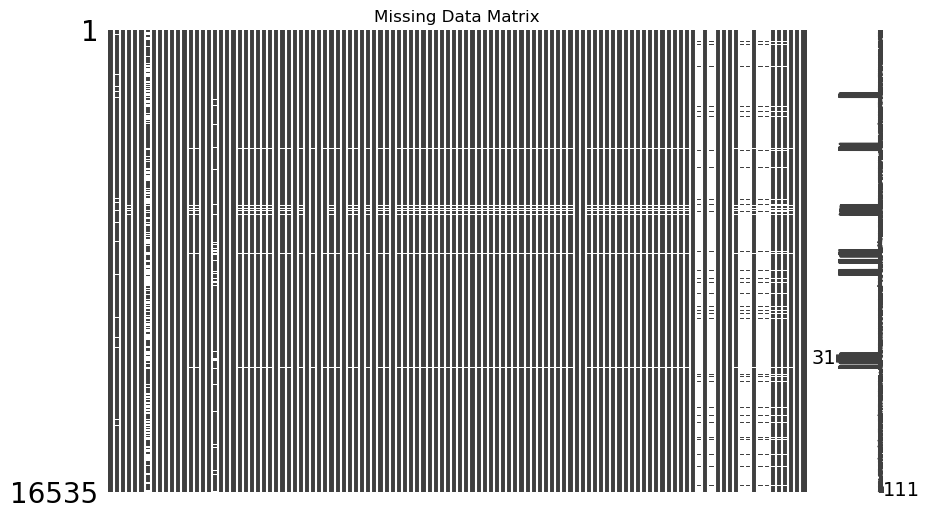

In [438]:
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\NAC_FINAL_DATA.csv'

# Read CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Visualize missing data using a matrix
msno.matrix(df, figsize=(10, 6))
plt.title('Missing Data Matrix')
plt.show()

identfiying the missing cloumns

In [439]:
df.isnull().sum()

Player                               0
Team                               625
Team within selected timeframe       0
Position                            56
Age                                  8
                                  ... 
Direct free kicks per 90          1510
Direct free kicks on target, %    1510
Corners per 90                     232
Penalties taken                      0
Penalty conversion, %                0
Length: 114, dtype: int64

Replacing the missing values in numerical columns with the mean is a suitable approach, especially considering its coefficient.

In [440]:
import numpy as np 
df_numerical = df.select_dtypes(include=[np.number])  #  here i selected only numerical columns
df_numerical_filled = df_numerical.fillna(df_numerical.mean())# here i replaced the numerical values with the mean
print("\nDataFrame with filled numerical values:")
print(df_numerical_filled)


DataFrame with filled numerical values:
        Age  Market value  Matches played  Minutes played  Goals     xG  \
0      19.0       1000000              21            1986      1   1.22   
1      22.0       1000000              26            2293     12  10.90   
2      20.0       1000000               8             476      0   0.37   
3      20.0        600000               4             389      0   0.66   
4      20.0        600000               5             464      1   0.08   
...     ...           ...             ...             ...    ...    ...   
16530  20.0             0              20             903      0   0.57   
16531  30.0             0              15             969      0   0.88   
16532  19.0             0              21            1588      4   4.51   
16533  19.0             0               9             442      0   0.13   
16534  19.0             0              21            1787      1   0.48   

       Assists    xA  Duels per 90  Duels won, %  ...  Pre

Replacing the missing values for categorical columns with imputation with the mode

In [441]:
# Handling missing categorical values - Imputation with mode
df_categorical = df.select_dtypes(exclude=[np.number])  # Select only non-numerical columns
df_categorical_filled = df_categorical.apply(lambda col: col.fillna(col.mode().iloc[0]))

# Display DataFrame with filled categorical values
print("\nDataFrame with filled categorical values:")
print(df_categorical_filled)


DataFrame with filled categorical values:
             Player              Team Team within selected timeframe  \
0         S. Baidoo          Salzburg                      Liefering   
1          M. Seidl        Rapid Wien                 Blau-Weiß Linz   
2           B. Okoh          Salzburg                      Liefering   
3       B. Koumetio      Austria Wien                Austria Wien II   
4        M. Polster      Austria Wien                Austria Wien II   
...             ...               ...                            ...   
16530    I. Shamoun        Eskilstuna                     Eskilstuna   
16531     Z. Fryers        Eskilstuna                     Eskilstuna   
16532  A. Al-Hamawi       Helsingborg                    Helsingborg   
16533   L. Kjellnäs  Helsingborgs U21                    Helsingborg   
16534  S. Bengtsson       Helsingborg                    Helsingborg   

               Position Contract expires  Birth country  \
0              RCB, LCB       202

I combined the non-numerical columns and the numerical columns, creating a new CSV file without the missing values.

In [442]:
# Combine numerical and categorical DataFrames
df_combined = pd.concat([df_numerical_filled, df_categorical_filled], axis=1)

# Display the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined)

# Save the combined DataFrame to a new CSV file
output_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
df_combined.to_csv(output_file_path, index=False)

print(f"\nCombined DataFrame saved to: {output_file_path}")


Combined DataFrame:
        Age  Market value  Matches played  Minutes played  Goals     xG  \
0      19.0       1000000              21            1986      1   1.22   
1      22.0       1000000              26            2293     12  10.90   
2      20.0       1000000               8             476      0   0.37   
3      20.0        600000               4             389      0   0.66   
4      20.0        600000               5             464      1   0.08   
...     ...           ...             ...             ...    ...    ...   
16530  20.0             0              20             903      0   0.57   
16531  30.0             0              15             969      0   0.88   
16532  19.0             0              21            1588      4   4.51   
16533  19.0             0               9             442      0   0.13   
16534  19.0             0              21            1787      1   0.48   

       Assists    xA  Duels per 90  Duels won, %  ...  Penalty conversion, %  


Combined DataFrame saved to: C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv


Checking for the final time for the missing values

In [443]:
# Load the combined DataFrame from the saved CSV file
loaded_df = pd.read_csv(output_file_path)

# Check for missing values in the loaded DataFrame
missing_values_loaded = loaded_df.isnull().sum()

# Display the DataFrame indicating missing values
print("\nDataFrame indicating missing values in the loaded file:")
print(missing_values_loaded)


DataFrame indicating missing values in the loaded file:
Age                 0
Market value        0
Matches played      0
Minutes played      0
Goals               0
                   ..
Contract expires    0
Birth country       0
Passport country    0
Foot                0
On loan             0
Length: 114, dtype: int64


Check for duplicate rows in the new combined file

In [444]:
# Check for duplicate rows in the combined DataFrame
duplicate_rows = df_combined[df_combined.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [Age, Market value, Matches played, Minutes played, Goals, xG, Assists, xA, Duels per 90, Duels won, %, Height, Weight, Successful defensive actions per 90, Defensive duels per 90, Defensive duels won, %, Aerial duels per 90, Aerial duels won, %, Sliding tackles per 90, PAdj Sliding tackles, Shots blocked per 90, Interceptions per 90, PAdj Interceptions, Fouls per 90, Yellow cards, Yellow cards per 90, Red cards, Red cards per 90, Successful attacking actions per 90, Goals per 90, Non-penalty goals, Non-penalty goals per 90, xG per 90, Head goals, Head goals per 90, Shots, Shots per 90, Shots on target, %, Goal conversion, %, Assists per 90, Crosses per 90, Accurate crosses, %, Crosses from left flank per 90, Accurate crosses from left flank, %, Crosses from right flank per 90, Accurate crosses from right flank, %, Crosses to goalie box per 90, Dribbles per 90, Successful dribbles, %, Offensive duels per 90, Offensive duels won, %, Touches in bo

Checking if it is appropriate numeric format

In [445]:
# Display information about the DataFrame
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16535 entries, 0 to 16534
Columns: 114 entries, Age to On loan
dtypes: float64(89), int64(16), object(9)
memory usage: 14.4+ MB


What is the range of Market Value of the players?

In [446]:
# Display descriptive statistics for the Market Value column
market_value_stats = df_combined['Market value'].describe()

# Extract the minimum and maximum values
min_market_value = market_value_stats['min']
max_market_value = market_value_stats['max']

# Display the range
print(f"Range of Market Value: {min_market_value} to {max_market_value}")

Range of Market Value: 0.0 to 60000000.0


### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

What is the average age of players in the dataset?

In [447]:
def calculate_column_average(csv_file, column_name):
    try:
        return pd.read_csv(csv_file)[column_name].mean()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
column_name_to_average = 'Age'

average_result = calculate_column_average(csv_file_path, column_name_to_average)

if average_result is not None:
    print(f"The average age is: {average_result}")

The average age is: 25.233859744660254


Which team has the highest market value on average?

In [448]:
def highest_avg_team(csv_file):
    try:
        df = pd.read_csv(csv_file)
        return df.groupby('Team')['Market value'].mean().idxmax()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
result = highest_avg_team(csv_file_path)

if result is not None:
    print(f"The team with the highest average market value is: {result}")

The team with the highest average market value is: Liverpool


How does the market value of players correlate with their age?


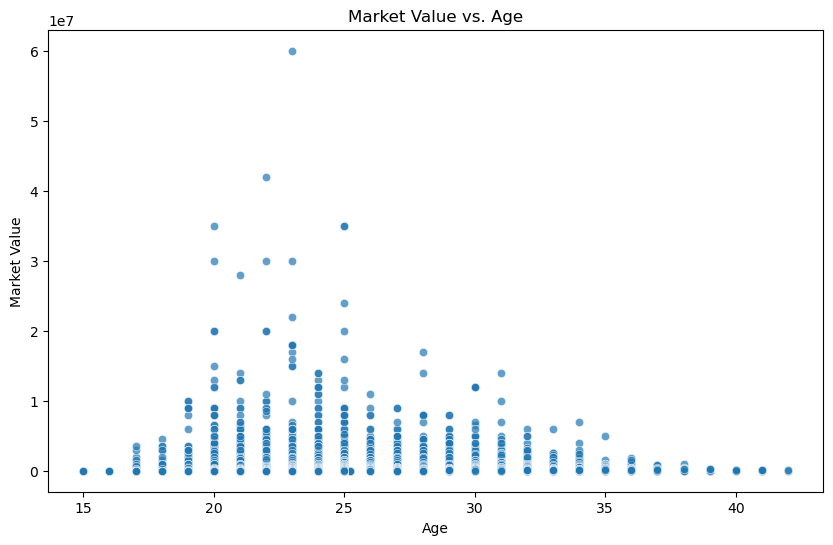

Correlation between Age and Market Value: 0.0071330535690319625


In [449]:
def plot_market_value_vs_age(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Assuming you have columns named 'Age' and 'Market value'
        if 'Age' not in df.columns or 'Market value' not in df.columns:
            print("Required columns not found in the CSV file.")
            return

        # Plot scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='Age', y='Market value', alpha=0.7)
        plt.title('Market Value vs. Age')
        plt.xlabel('Age')
        plt.ylabel('Market Value')
        plt.show()

        # Calculate correlation coefficient
        correlation_coefficient = df['Age'].corr(df['Market value'])
        print(f"Correlation between Age and Market Value: {correlation_coefficient}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_market_value_vs_age(csv_file_path)

What is the distribution of players' positions across different teams?

In [450]:
import pandas as pd

# Load the CSV file
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
df = pd.read_csv(csv_file_path)

# Display unique positions and their frequencies
position_counts = df['Position'].value_counts()
print(position_counts)


Position
CF                 1571
GK                 1280
LCB                 581
LB                  556
RCB                 551
                   ... 
LDMF, LCB, LB         1
RCB, RB, LCMF         1
RCMF, RWF, LAMF       1
RWF, AMF, RB          1
CB, RB, LCB           1
Name: count, Length: 1533, dtype: int64


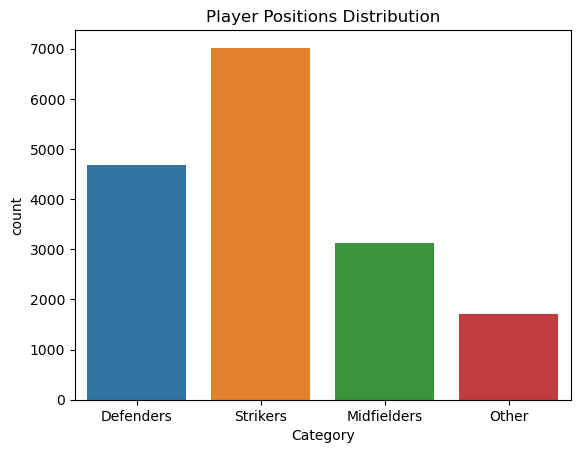

In [451]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_positions(position):
    if any(role in position for role in ['ST', 'CF', 'RW', 'RWF', 'LW', 'LWF']):
        return 'Strikers'
    elif any(role in position for role in ['CM', 'CDM', 'CAM', 'RM', 'LM']):
        return 'Midfielders'
    elif any(role in position for role in ['CB', 'LB', 'RB', 'LCB', 'RCB']):
        return 'Defenders'
    else:
        return 'Other'

def plot_categorized_position_distribution(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Categorize positions
        df['Category'] = df['Position'].apply(categorize_positions)

        # Plot the distribution
        sns.countplot(x='Category', data=df)
        plt.title('Player Positions Distribution')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_categorized_position_distribution(csv_file_path)


The highest representatio

In [452]:
def highest_representation_country(csv_file):
    try:
        return pd.read_csv(csv_file)['Birth country'].value_counts().idxmax()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
result = highest_representation_country(csv_file_path)

if result is not None:
    print(f"The country with the highest representation is: {result}")

The country with the highest representation is: Italy


Is there a correlation between a player's height and weight and the number of goals scored?

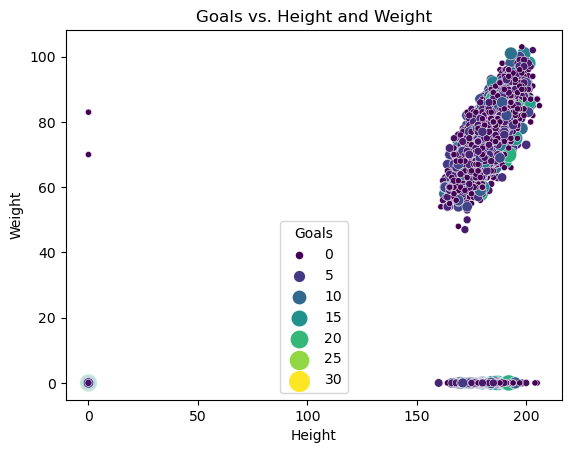

Correlation Height-Goals: 0.06499178577864126, Weight-Goals: 0.0635641149450418


In [453]:


def plot_goals_vs_height_weight(csv_file):
    try:
        df = pd.read_csv(csv_file)
        sns.scatterplot(x='Height', y='Weight', hue='Goals', data=df, palette='viridis', size='Goals', sizes=(20, 200))
        plt.title('Goals vs. Height and Weight')
        plt.xlabel('Height')
        plt.ylabel('Weight')
        plt.show()

        correlation_height_goals = df['Height'].corr(df['Goals'])
        correlation_weight_goals = df['Weight'].corr(df['Goals'])
        print(f"Correlation Height-Goals: {correlation_height_goals}, Weight-Goals: {correlation_weight_goals}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_goals_vs_height_weight(csv_file_path)

How does the number of goals per player vary across different positions?

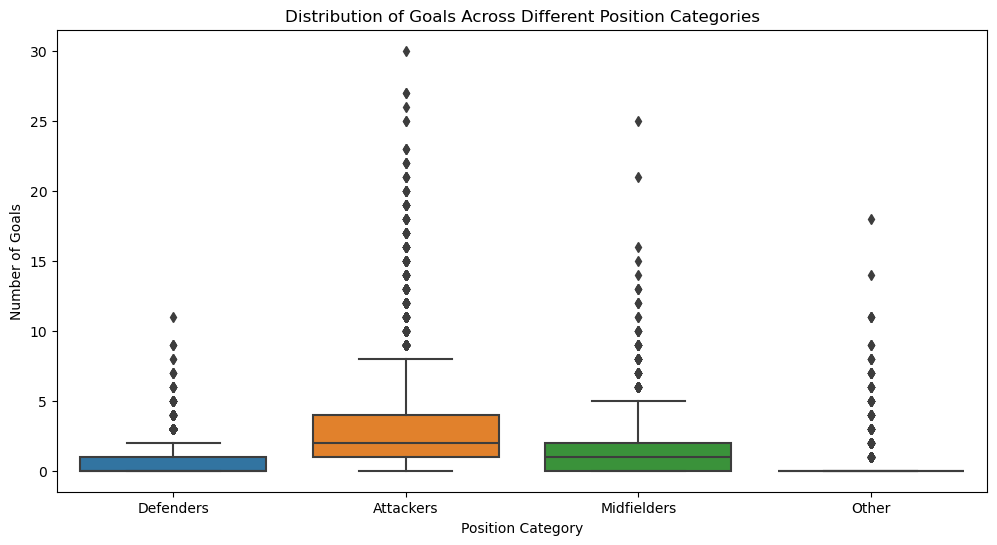

In [454]:


def categorize_positions(position):
    if any(pos in position for pos in ['ST', 'CF', 'RW', 'RWF', 'LW', 'LWF']):
        return 'Attackers'
    elif any(pos in position for pos in ['CAM', 'CM', 'CDM']):
        return 'Midfielders'
    elif any(pos in position for pos in ['CB', 'RB', 'LB', 'RWB', 'LWB']):
        return 'Defenders'
    else:
        return 'Other'

def plot_goals_distribution(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Create a new column 'Position Category'
        df['Position Category'] = df['Position'].apply(categorize_positions)

        # Plot the distribution of goals for each position category
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Position Category', y='Goals', data=df)
        plt.title('Distribution of Goals Across Different Position Categories')
        plt.xlabel('Position Category')
        plt.ylabel('Number of Goals')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_goals_distribution(csv_file_path)


What is the average number of matches played by players in different age groups?

c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


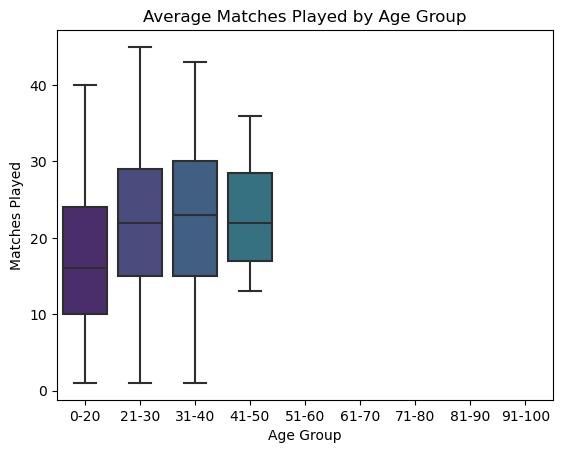

In [455]:
def plot_avg_matches_per_age_group(csv_file):
    try:
        df = pd.read_csv(csv_file)
        df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
        sns.boxplot(x='Age Group', y='Matches played', data=df, palette='viridis')
        plt.title('Average Matches Played by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Matches Played')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_avg_matches_per_age_group(csv_file_path)

Which players have the highest ‘xG (Expected Goals)' value and how does it compare with actual goals scored?

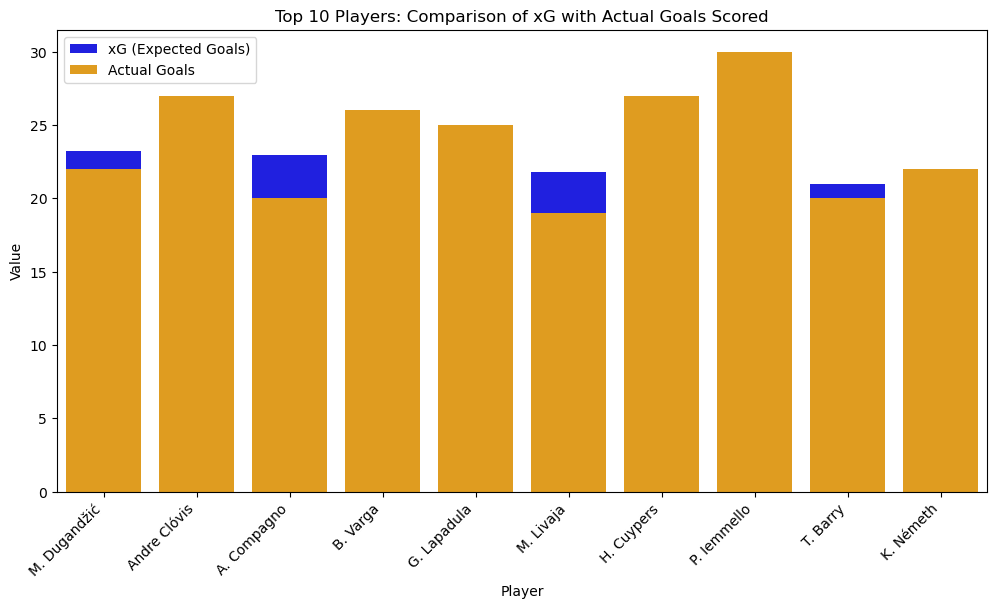

In [456]:


def compare_top_xg_players(csv_file, top_n=10):
    try:
        df = pd.read_csv(csv_file)

        # Sort the dataframe based on 'xG' in descending order
        top_xg_players = df.sort_values(by='xG', ascending=False).head(top_n)

        # Plotting
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Player', y='xG', data=top_xg_players, color='blue', label='xG (Expected Goals)')
        sns.barplot(x='Player', y='Goals', data=top_xg_players, color='orange', label='Actual Goals')
        plt.title(f'Top {top_n} Players: Comparison of xG with Actual Goals Scored')
        plt.xlabel('Player')
        plt.ylabel('Value')
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
compare_top_xg_players(csv_file_path, top_n=10)

What is the average contract duration left for players in each team?

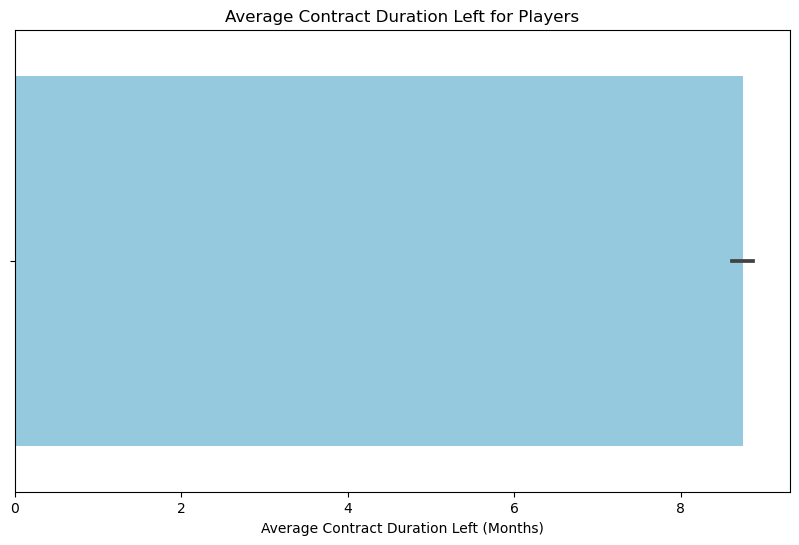

In [457]:

def average_contract_duration(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Convert 'Contract expires' column to datetime format
        df['Contract expires'] = pd.to_datetime(df['Contract expires'], errors='coerce')

        # Calculate the remaining contract duration in months
        df['Contract Duration Left (Months)'] = (df['Contract expires'] - pd.to_datetime('today')).dt.days // 30

        # Plotting
        plt.figure(figsize=(10, 6))  # Adjust figure size
        sns.barplot(x='Contract Duration Left (Months)', data=df, color='skyblue')
        plt.title('Average Contract Duration Left for Players')
        plt.xlabel('Average Contract Duration Left (Months)')
        plt.ylabel('')  # No y-axis label

        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
average_contract_duration(csv_file_path)


How do ‘Duels won %' and ‘Aerial duels won %' vary by position?


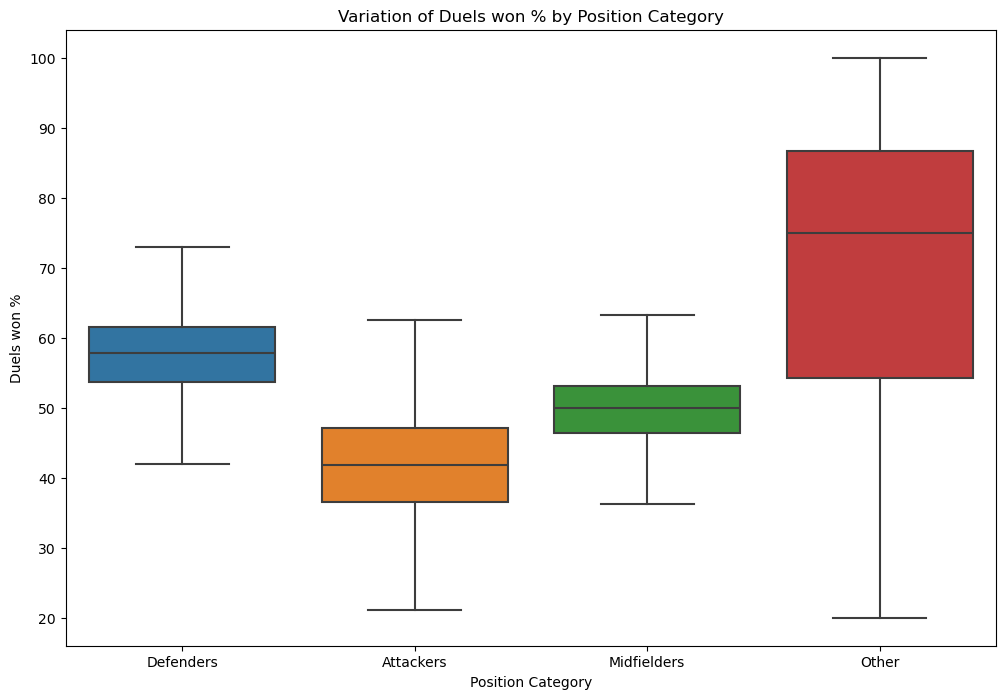

In [458]:

def categorize_positions(position):
    if any(pos in position for pos in ['ST', 'CF', 'RW', 'RWF', 'LW', 'LWF']):
        return 'Attackers'
    elif any(pos in position for pos in ['CAM', 'CM', 'CDM']):
        return 'Midfielders'
    elif any(pos in position for pos in ['CB', 'RB', 'LB', 'RWB', 'LWB']):
        return 'Defenders'
    else:
        return 'Other'

def plot_duels_by_position(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Create a new column 'Position Category'
        df['Position Category'] = df['Position'].apply(categorize_positions)

        # Convert 'Duels won, %' and 'Aerial duels won, %' columns to numeric
        df['Duels won, %'] = pd.to_numeric(df['Duels won, %'], errors='coerce')
        df['Aerial duels won, %'] = pd.to_numeric(df['Aerial duels won, %'], errors='coerce')

        # Plotting
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Position Category', y='Duels won, %', data=df, showfliers=False)
        plt.title('Variation of Duels won % by Position Category')
        plt.xlabel('Position Category')
        plt.ylabel('Duels won %')
        plt.show()

     

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_duels_by_position(csv_file_path)


Is there a significant difference in ‘Successful defensive actions per 90' between players on loan and permanent players?

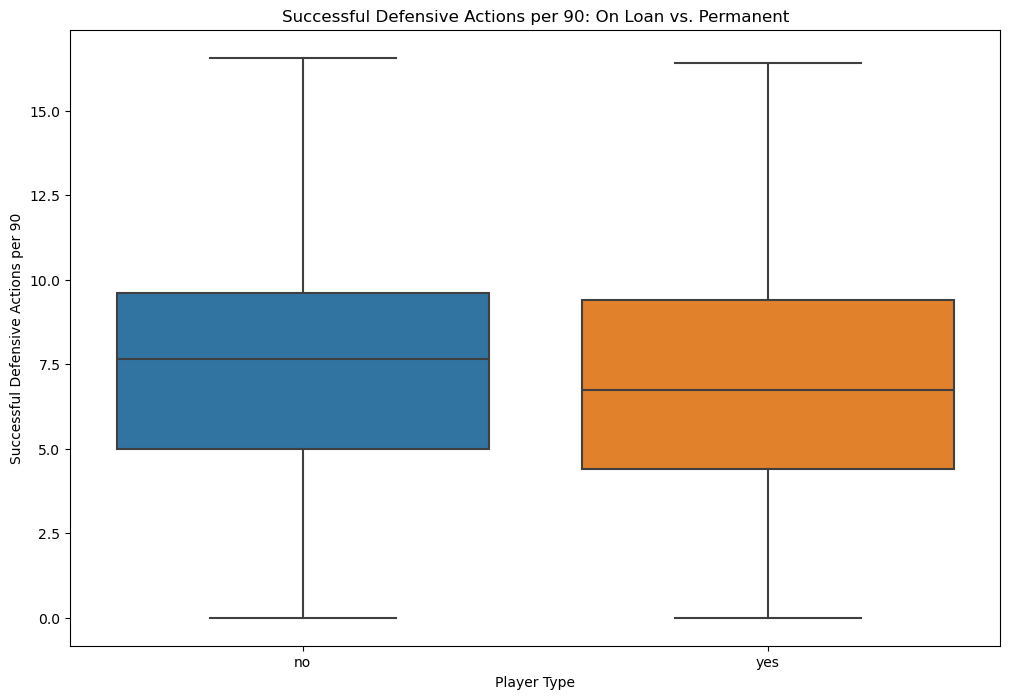

T-Test Results:
Statistical Value: nan
P-Value: nan


In [459]:
        
def compare_defensive_actions_on_loan_vs_permanent(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Convert 'Successful defensive actions per 90' column to numeric
        df['Successful defensive actions per 90'] = pd.to_numeric(df['Successful defensive actions per 90'], errors='coerce')

        # Split data into on loan and permanent players
        on_loan = df[df['On loan'] == 'Yes']
        permanent = df[df['On loan'] == 'No']

        # Perform t-test
        stat, p_value = ttest_ind(on_loan['Successful defensive actions per 90'], permanent['Successful defensive actions per 90'], nan_policy='omit')

        # Plotting
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='On loan', y='Successful defensive actions per 90', data=df, showfliers=False)
        plt.title('Successful Defensive Actions per 90: On Loan vs. Permanent')
        plt.xlabel('Player Type')
        plt.ylabel('Successful Defensive Actions per 90')
        plt.show()

        # Print t-test results
        print(f"T-Test Results:\nStatistical Value: {stat}\nP-Value: {p_value}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
compare_defensive_actions_on_loan_vs_permanent(csv_file_path)

Which players have the highest ‘Successful attacking actions per 90' and which position do they play?

In [460]:
def highest_successful_attacking_actions(csv_file, num_players=1):
    try:
        df = pd.read_csv(csv_file)

        # Find the top N players with the highest 'Successful attacking actions per 90'
        top_players = df.nlargest(num_players, 'Successful attacking actions per 90')

        # Display the result
        print(f"The {num_players} players with the highest Successful attacking actions per 90 are:")
        for index, player in top_players.iterrows():
            print(f"Player: {player['Player']}")
            print(f"Position: {player['Position']}")
            print(f"Successful attacking actions per 90: {player['Successful attacking actions per 90']}")
            print("-" * 20)

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
highest_successful_attacking_actions(csv_file_path, num_players=3)

The 3 players with the highest Successful attacking actions per 90 are:
Player: C. Madueke
Position: RAMF, RWF
Successful attacking actions per 90: 15.95
--------------------
Player: Francisco Conceicão
Position: RWF, RAMF, RW
Successful attacking actions per 90: 15.3
--------------------
Player: O. Niang
Position: LW, LWF
Successful attacking actions per 90: 12.54
--------------------


What is the relationship between ‘Goals per 90' and ‘Assists per 90' for forwards?

C:\Users\jimal\AppData\Local\Temp\ipykernel_31504\2190322103.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Goals per 90', y='Assists per 90', data=forwards_df, palette='viridis')


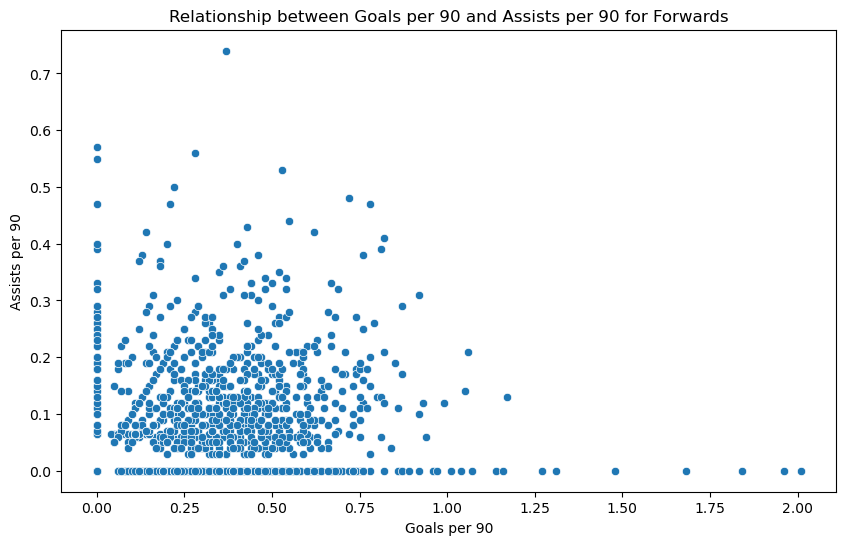

In [461]:
def plot_goals_assists_relationship(csv_file):
    try:
        df = pd.read_csv(csv_file)

        # Filter data for forwards
        Forward=['CF','RWF','LWF']
        forwards_df = df[df['Position'].isin(Forward)]

       
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Goals per 90', y='Assists per 90', data=forwards_df, palette='viridis')
        plt.title('Relationship between Goals per 90 and Assists per 90 for Forwards')
        plt.xlabel('Goals per 90')
        plt.ylabel('Assists per 90')
     
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
csv_file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
plot_goals_assists_relationship(csv_file_path)

Which players exceed in ‘Shots on target %' and how does it relate to their overall ‘Goal conversion %'?

In [462]:
high_shots_on_target = df[df['Shots on target, %'] > df['Shots on target, %'].mean()]

#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='Shots on target %', y='Goal conversion %', hue='Goal conversion %', palette='viridis', size='Goal conversion %', sizes=(20, 200), data=shooting_df)


#plt.legend(title='Goal Conversion %')

print("Players who exceed in ‘Shots on target %':")
print(high_shots_on_target[['Player', 'Shots on target, %', 'Goal conversion, %']])
#plt.show()

Players who exceed in ‘Shots on target %':
             Player  Shots on target, %  Goal conversion, %
1          M. Seidl               31.52              13.043
2           B. Okoh               33.33               0.000
3       B. Koumetio               33.33               0.000
4        M. Polster               40.00              20.000
6         O. Strunz               41.67              16.667
...             ...                 ...                 ...
16528   L. Olausson               44.44               0.000
16529     F. Bohman               59.26              22.222
16530    I. Shamoun               40.00               0.000
16532  A. Al-Hamawi               33.33               9.524
16534  S. Bengtsson               50.00              16.667

[8634 rows x 3 columns]


How do ‘Passes per 90' and ‘Accurate passes %' correlate for midfielders?



Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?



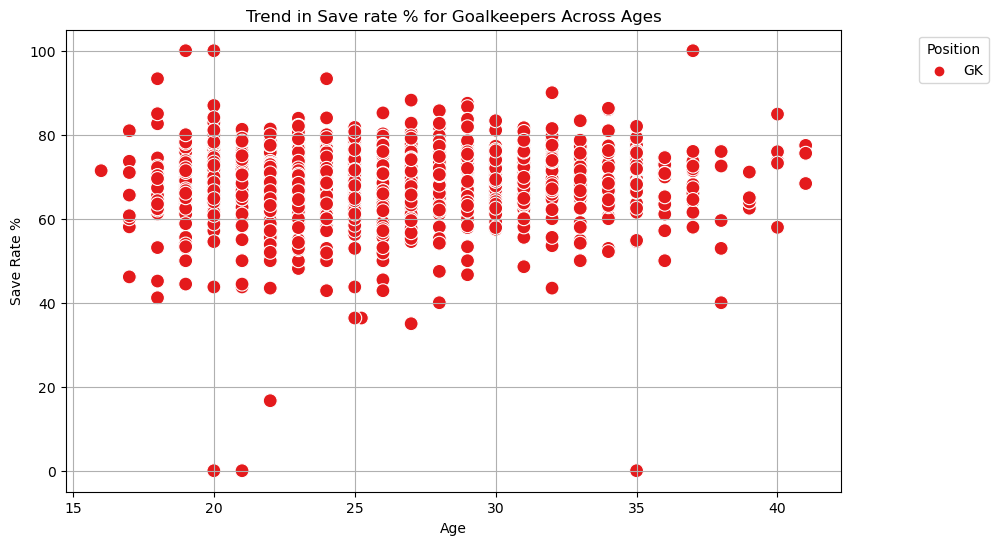

In [463]:
# Assuming you have loaded your data into a DataFrame called 'df'
# Load your data and filter for goalkeepers
goalkeepers_df = df[df['Position'] == 'GK']

# Create a scatter plot to visualize the trend in 'Save rate %' across different age groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Save rate, %', data=goalkeepers_df, hue='Position', palette='Set1', s=100)
plt.title('Trend in Save rate % for Goalkeepers Across Ages')
plt.xlabel('Age')
plt.ylabel('Save Rate %')
plt.legend(title='Position', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


What is the distribution of ‘Yellow cards per 90' and ‘Red cards per 90' across different positions?

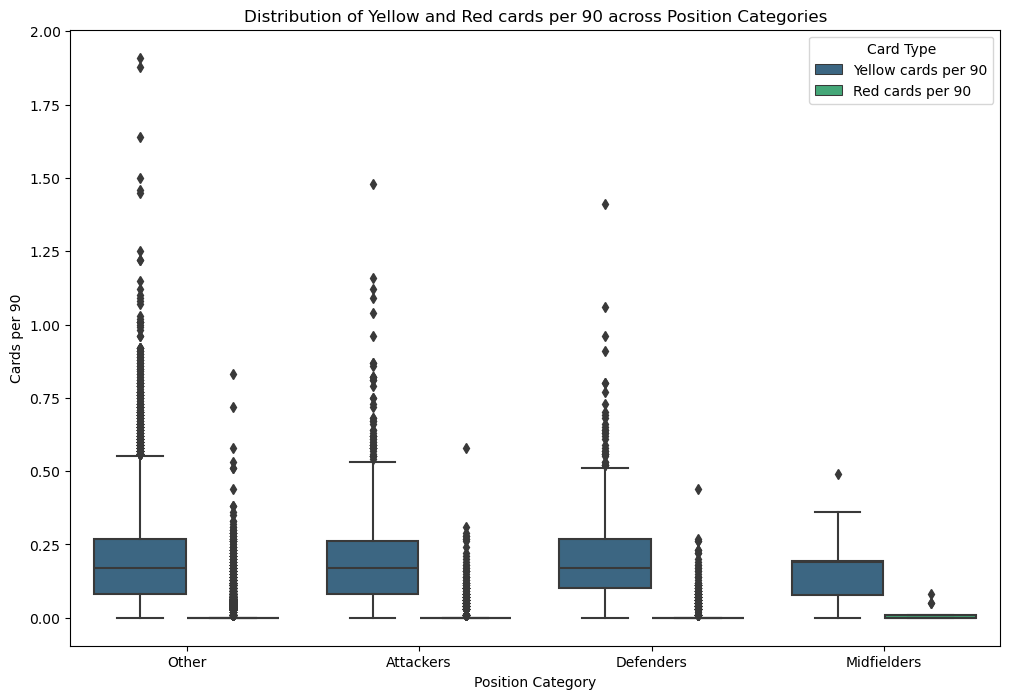

In [464]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided file path
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'

# Load the data
df = pd.read_csv(file_path)

# Create a dictionary to map specific positions to broader categories
position_categories = {
    'Attackers': ['ST', 'CF', 'LW', 'LWF', 'RW', 'RWF', 'RF'],
    'Defenders': ['CB', 'LB', 'LWB', 'RB', 'RWB'],
    'Midfielders': ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LCM', 'RCM', 'LAMF', 'RAMF', 'LF', 'RF']
}

# Map positions to broader categories
df['Position Category'] = df['Position'].apply(lambda x: next((category for category, positions in position_categories.items() if x in positions), 'Other'))

# Filter relevant columns
cards_df = df[['Position Category', 'Yellow cards per 90', 'Red cards per 90']]

# Melt the DataFrame to long format for better visualization
cards_df = pd.melt(cards_df, id_vars='Position Category', var_name='Card Type', value_name='Cards per 90')

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position Category', y='Cards per 90', hue='Card Type', data=cards_df, palette='viridis')
plt.title('Distribution of Yellow and Red cards per 90 across Position Categories')
plt.show()

How does ‘Fouls suffered per 90' compare for attackers and defenders?

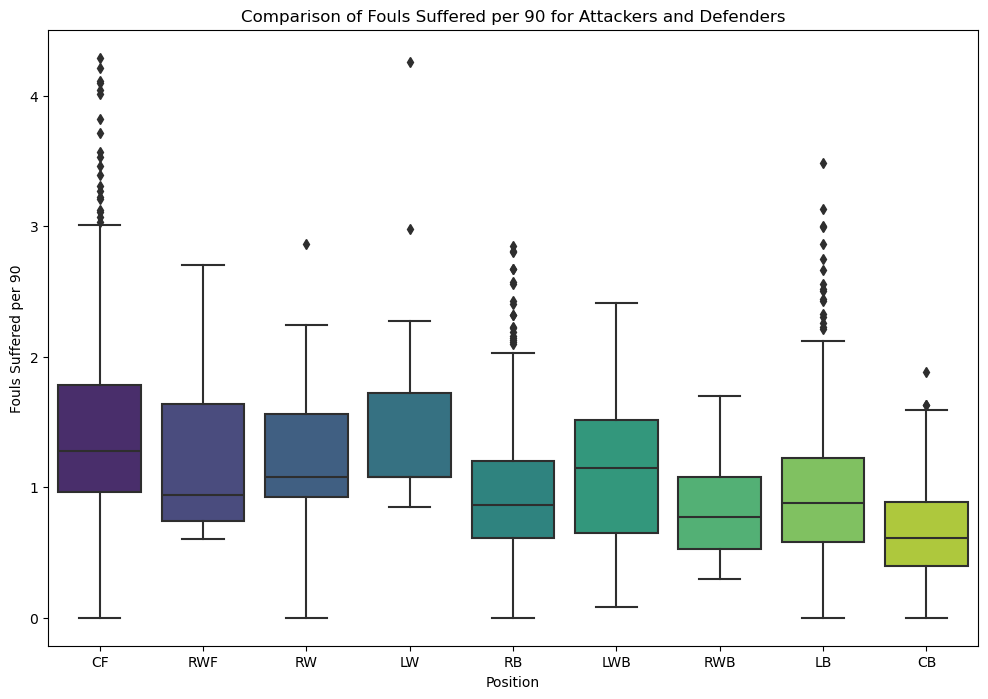

In [465]:
# Assuming my DataFrame is named 'df'
# Clean the column names (remove leading/trailing whitespaces)
df.columns = [col.strip() for col in df.columns]

# Select relevant columns
fouls_columns = ['Position', 'Fouls suffered per 90']
fouls_df = df[fouls_columns]

# Drop rows with missing values
fouls_df = fouls_df.dropna(subset=['Fouls suffered per 90'])

# Filter data for attackers and defenders
attackers_df = fouls_df[fouls_df['Position'].isin(['ST', 'CF', 'LW', 'RW', 'RWF', 'RF',])]
defenders_df = fouls_df[fouls_df['Position'].isin(['CB', 'LB', 'RB','RWB','LWB'])]

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Fouls suffered per 90', data=pd.concat([attackers_df, defenders_df]), palette='viridis')
plt.title('Comparison of Fouls Suffered per 90 for Attackers and Defenders')
plt.xlabel('Position')
plt.ylabel('Fouls Suffered per 90')
plt.show()

Which players have the highest ‘Penalty conversion %' and what are their overall shooting statistics?

In [466]:
# Find players with the highest 'Penalty conversion %'
highest_penalty_conversion = df.nlargest(5, 'Penalty conversion, %')

# Display overall shooting statistics for these players
selected_columns = ['Player', 'Shots per 90', 'Goals per 90', 'Assists per 90', 'Penalty conversion, %']
print(highest_penalty_conversion[selected_columns])


            Player  Shots per 90  Goals per 90  Assists per 90  \
9         I. Dramé          3.17          0.44            0.06   
13        R. Vučić          2.08          0.22            0.00   
36   J. Keiblinger          0.82          0.16            0.13   
45  Gustavo Santos          3.02          0.62            0.08   
53     P. Fallmann          0.44          0.05            0.10   

    Penalty conversion, %  
9                   100.0  
13                  100.0  
36                  100.0  
45                  100.0  
53                  100.0  


### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

Distribution of Goals per 90 Minutes for Attackers

In [467]:
# Create a histogram of Goals per 90 Minutes for Attackers
plt.figure(figsize=(12, 6))
sns.histplot(attackers_df['Goals per 90'], bins=20, kde=True, color='red')
plt.title('Distribution of Goals per 90 Minutes for Attackers')
plt.xlabel('Goals per 90 Minutes')
plt.ylabel('Frequency')
plt.show()


KeyError: 'Goals per 90'

<Figure size 1200x600 with 0 Axes>

The top 10 players based on the number of goals they scored.

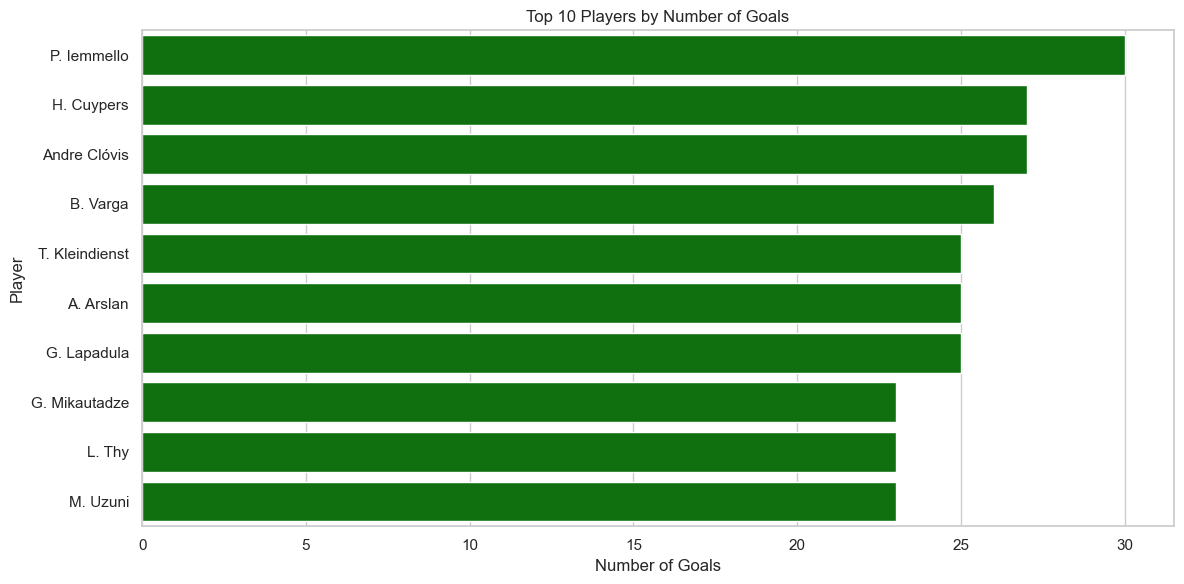

In [ ]:
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
    data = pd.DataFrame()  # Create an empty DataFrame to prevent further errors

if 'Player' in data.columns and 'Goals' in data.columns:
    # Select the top 10 players based on the number of goals
    top_players = data.nlargest(10, 'Goals')

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Goals', y='Player', data=top_players, color='green')
    plt.title('Top 10 Players by Number of Goals')
    plt.xlabel('Number of Goals')
    plt.ylabel('Player')
    plt.tight_layout()
    plt.savefig('top_players_by_goals.png')
    plt.show()
else:
    print("The 'Player' or 'Goals' column does not exist in the dataset.")

 pie chart to visualize the distribution of players based on their positions.

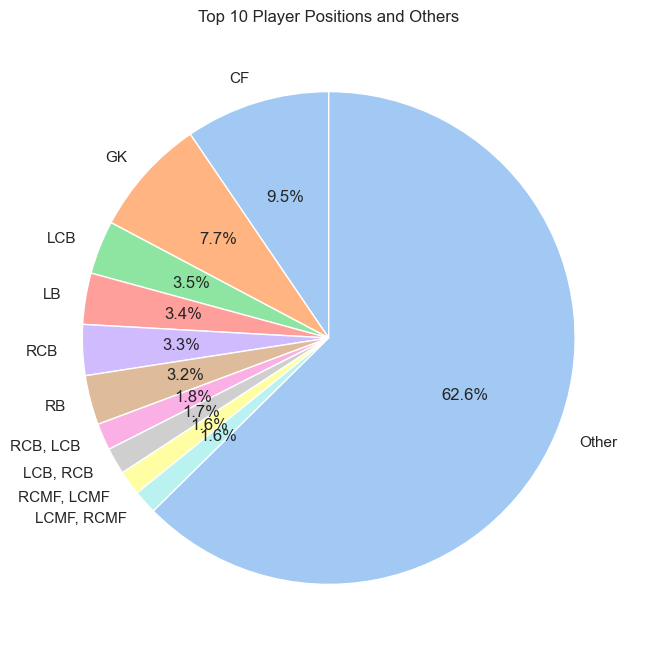

In [ ]:
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
    data = pd.DataFrame()  # Create an empty DataFrame to prevent further errors

if 'Position' in data.columns:
    position_counts = data['Position'].value_counts()

    # Select the top 10 positions and group the rest as 'Other'
    top_positions = position_counts.head(10)
    other_positions = pd.Series([position_counts[10:].sum()], index=['Other'])
    position_counts = pd.concat([top_positions, other_positions])

    plt.figure(figsize=(8, 8))
    plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Top 10 Player Positions and Others')
    plt.savefig('top_player_positions_pie_chart.png')
    plt.show()
else:
    print("The 'Position' column does not exist in the dataset.")


Goals vs xG

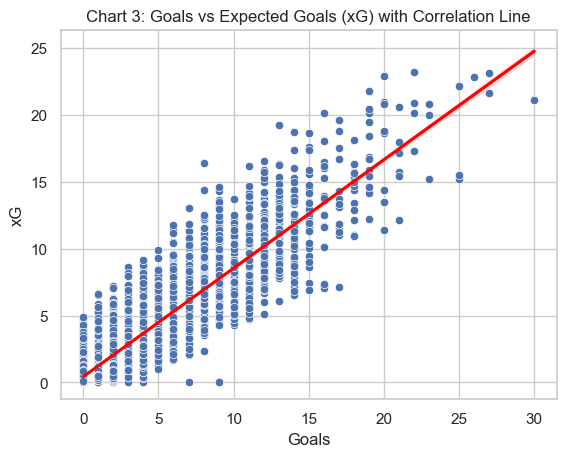

In [ ]:
chart3 = sns.scatterplot(x='Goals', y='xG', data=data)
sns.regplot(x='Goals', y='xG', data=data, scatter=False, ax=chart3, color='red')  # Add correlation line
plt.title('Chart 3: Goals vs Expected Goals (xG) with Correlation Line')
plt.savefig('chart3.png')
plt.show()

c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


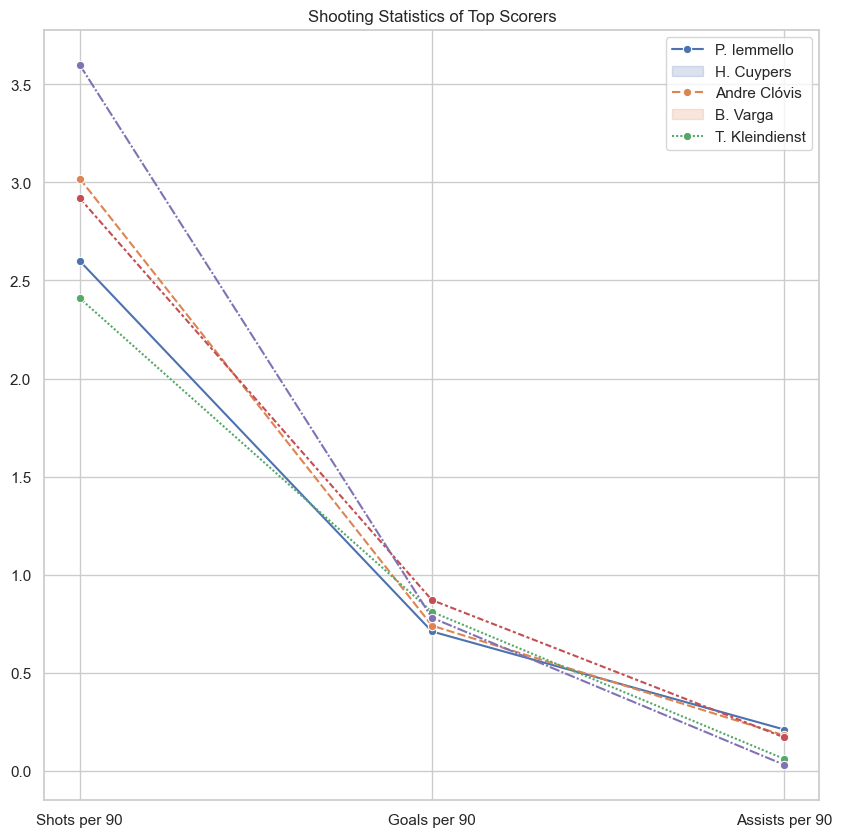

In [ ]:
# Identify top goal scorers
top_scorers = attackers_df.nlargest(5, 'Goals')

# Select relevant columns for radar chart
radar_columns = ['Shots per 90', 'Goals per 90', 'Assists per 90']

# Create a radar chart for shooting statistics of top scorers
plt.figure(figsize=(10, 10))
sns.lineplot(data=top_scorers[radar_columns].T, marker='o')
plt.title('Shooting Statistics of Top Scorers')
plt.legend(top_scorers['Player'], loc='upper right')
plt.show()


Violin Plot of Assists per 90 Minutes by Position

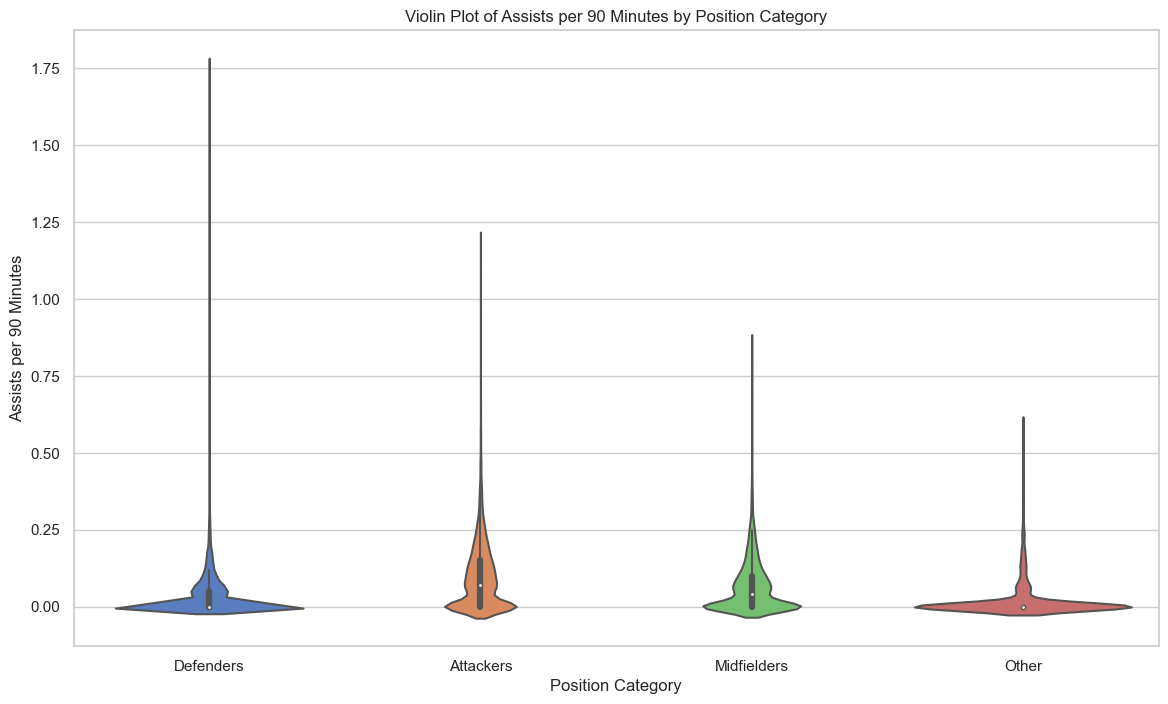

In [ ]:
# Define a function to categorize positions
def categorize_position(position):
    if any(role in position for role in ['ST', 'CF', 'LW', 'LF', 'RW', 'RWF', 'RF']):
        return 'Attackers'
    elif any(role in position for role in ['CM', 'CDM', 'CAM', 'LM', 'RM']):
        return 'Midfielders'
    elif any(role in position for role in ['CB', 'LB', 'RB', 'LWB', 'RWB']):
        return 'Defenders'
    else:
        return 'Other'

# Apply the function to create a new 'Position Category' column
df['Position Category'] = df['Position'].apply(categorize_position)

# Create a violin plot of Assists per 90 Minutes by Position Category
plt.figure(figsize=(14, 8))
sns.violinplot(x='Position Category', y='Assists per 90', data=df, palette='muted')
plt.title('Violin Plot of Assists per 90 Minutes by Position Category')
plt.xlabel('Position Category')
plt.ylabel('Assists per 90 Minutes')
plt.show()


### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

In [ ]:
import requests

# Make a GET request to the RandomUser API and get the response
response = requests.get("https://randomuser.me/api/")

# Print the JSON content of the response
print(response.json())

# Alternatively, you can access the raw text of the response
# raw_text = response.text


{'results': [{'gender': 'female', 'name': {'title': 'Mrs', 'first': 'Caitlin', 'last': 'Walker'}, 'location': {'street': {'number': 9752, 'name': 'Chatham Road'}, 'city': 'Dunedin', 'state': 'Southland', 'country': 'New Zealand', 'postcode': 94868, 'coordinates': {'latitude': '52.7869', 'longitude': '3.6029'}, 'timezone': {'offset': '-4:00', 'description': 'Atlantic Time (Canada), Caracas, La Paz'}}, 'email': 'caitlin.walker@example.com', 'login': {'uuid': '2c94f22a-ff90-4516-84dc-a7879986495c', 'username': 'silverostrich498', 'password': 'startrek', 'salt': '7JcvfBUr', 'md5': 'c6bf01edf3f40a8985606e163f7bcfef', 'sha1': '6b1b48da1d5248119812ef1cc4edd8884236068e', 'sha256': 'f58fc3c9b2029fb2027faaf4532db2f7f498879702ac82262afe84e92ad77aa0'}, 'dob': {'date': '1973-06-25T08:45:15.399Z', 'age': 50}, 'registered': {'date': '2011-12-07T19:03:06.351Z', 'age': 12}, 'phone': '(653)-363-7029', 'cell': '(589)-962-7184', 'id': {'name': '', 'value': None}, 'picture': {'large': 'https://randomuser.m

In [ ]:
# Make a GET request to The Cat API and get the response
response = requests.get("https://api.thecatapi.com/")

# Print the JSON content of the response
print(response.json())

# Alternatively, you can access the raw text of the response
# raw_text = response.text


{'message': 'The Cat API', 'version': '1.3.7'}


In [ ]:
# Make a GET request to The Dog API to fetch information about dog breeds
response = requests.get("https://api.thedogapi.com/v1/breeds")

# Print the JSON content of the response
print(response.json())

# Alternatively, you can access the raw text of the response
# raw_text = response.text


[{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'}, 'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'}, 'id': 1, 'name': 'Affenpinscher', 'bred_for': 'Small rodent hunting, lapdog', 'breed_group': 'Toy', 'life_span': '10 - 12 years', 'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving', 'origin': 'Germany, France', 'reference_image_id': 'BJa4kxc4X'}, {'weight': {'imperial': '50 - 60', 'metric': '23 - 27'}, 'height': {'imperial': '25 - 27', 'metric': '64 - 69'}, 'id': 2, 'name': 'Afghan Hound', 'country_code': 'AG', 'bred_for': 'Coursing and hunting', 'breed_group': 'Hound', 'life_span': '10 - 13 years', 'temperament': 'Aloof, Clownish, Dignified, Independent, Happy', 'origin': 'Afghanistan, Iran, Pakistan', 'reference_image_id': 'hMyT4CDXR'}, {'weight': {'imperial': '44 - 66', 'metric': '20 - 30'}, 'height': {'imperial': '30', 'metric': '76'}, 'id': 3, 'name': 'African Hunting Dog', 'bred_for': 'A wild pack animal', 'life_span': '11 years', 'temperament'

In [ ]:
# Make a GET request to The Cat API to fetch information about cat breeds
response = requests.get("https://api.thecatapi.com/v1/breeds")

# Accessing various attributes and methods of the response object

# Print the full response object
print(response)

# Print the status code of the response
print(response.status_code)

# Print the raw text content of the response
print(response.text)

# Print the headers of the response
print(response.headers)

# Accessing details of the request made

# Print the original request object associated with the response
print(response.request)

# Accessing specific attributes of the request object
request = response.request
print(request.url)
print(request.path_url)
print(request.method)
print(request.headers)


<Response [200]>
200
[{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinia

In [ ]:
# Make a GET request to The Cat API to fetch information about cat breeds
response = requests.get("https://api.thecatapi.com/v1/breeds")

# Access and print the headers of the response
print(response.headers)

{'x-dns-prefetch-control': 'off', 'x-frame-options': 'SAMEORIGIN', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'vary': 'Origin', 'pagination-count': '67', 'pagination-page': '0', 'pagination-limit': '1000', 'access-control-expose-headers': 'Pagination-Count, Pagination-Page, Pagination-Limit', 'content-type': 'application/json; charset=utf-8', 'x-response-time': '4ms', 'X-Cloud-Trace-Context': 'ce986d5c28d56884b3ce3dcba853bd9b', 'Date': 'Wed, 10 Jan 2024 15:49:37 GMT', 'Server': 'Google Frontend', 'Content-Length': '76734'}


In [ ]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")

# Access and print the "Content-Type" header from the response
content_type = response.headers.get("Content-Type")
print(content_type)

application/json; charset=utf-8


In [ ]:
import requests

# JSONPlaceholder API endpoint for fetching user data
api_url = "https://jsonplaceholder.typicode.com/users"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse and print the JSON data from the response
    users = response.json()
    
    # Print the details of the first user
    print("User Details:")
    print(f"Name: {users[0]['name']}")
    print(f"Email: {users[0]['email']}")
    print(f"Address: {users[0]['address']['city']}, {users[0]['address']['street']}")
else:
    print(f"Error: {response.status_code}")


User Details:
Name: Leanne Graham
Email: Sincere@april.biz
Address: Gwenborough, Kulas Light


In [ ]:
import requests
import random

# JSONPlaceholder API endpoint for fetching user data
api_url = "https://jsonplaceholder.typicode.com/users"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse and get the list of users
    users = response.json()
    
    # Select a random user from the list
    random_user = random.choice(users)
    
    # Print details of the random user
    print("Random User Details:")
    print(f"Name: {random_user['name']}")
    print(f"Email: {random_user['email']}")
    print(f"Address: {random_user['address']['city']}, {random_user['address']['street']}")
else:
    print(f"Error: {response.status_code}")


Random User Details:
Name: Ervin Howell
Email: Shanna@melissa.tv
Address: Wisokyburgh, Victor Plains


In [ ]:
# Make a GET request to fetch an image from the specified URL
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)

# Access and print the "Content-Type" header from the response
content_type = response.headers.get("Content-Type")
print(content_type)

image/png


In [ ]:
# Make a GET request to the RandomUser API with parameters for gender and country
url = "https://randomuser.me/api/?gender=female&country=YE"
response = requests.get(url)

# Parse and print the JSON content of the response
data = response.json()
print(data)

{'results': [{'gender': 'female', 'name': {'title': 'Miss', 'first': 'Clara', 'last': 'Marín'}, 'location': {'street': {'number': 5997, 'name': 'Calle Nebrija'}, 'city': 'San Sebastián', 'state': 'Comunidad de Madrid', 'country': 'Spain', 'postcode': 32934, 'coordinates': {'latitude': '-36.9620', 'longitude': '-100.0616'}, 'timezone': {'offset': '+9:30', 'description': 'Adelaide, Darwin'}}, 'email': 'clara.marin@example.com', 'login': {'uuid': '84e9eb84-3c3a-4cf3-b1f1-37fbe421e04a', 'username': 'whitecat269', 'password': 'adidas', 'salt': 'mWmQW0n8', 'md5': '9c92f52500511179aef69b185cbae5ce', 'sha1': '2ec7c7ffc090eb2d3001ce9f90f14d6b678c7c34', 'sha256': '2f93697448675b255dd2e8a8b530f71378758733e17cb967d2729046aca72c5e'}, 'dob': {'date': '1969-10-14T21:53:19.907Z', 'age': 54}, 'registered': {'date': '2021-09-28T20:19:30.357Z', 'age': 2}, 'phone': '992-109-036', 'cell': '668-302-122', 'id': {'name': 'DNI', 'value': '83720058-T'}, 'picture': {'large': 'https://randomuser.me/api/portraits/

 checking if my name is in the data

In [ ]:
# Make a request to the RandomUser API
response = requests.get("https://randomuser.me/api/?gender=male&nat=YE")

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Check if there are results in the response
    if 'results' in data and len(data['results']) > 0:
        # Extract the first name from the response
        first_name = data['results'][0]['name']['first']

        # Check if the name is "Musaed"
        if first_name.lower() == "musaed":
            print(f"The name is Musaed: {first_name}")
        else:
            print(f"The name is not Musaed: {first_name}")
    else:
        print("No results found.")
else:
    print(f"Error: {response.status_code}")





The name is not Musaed: Tony


In [ ]:
# Make a request to the API
response = requests.get("https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos", params={"sol": 1000, "api_key": "DEMO_KEY"})

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Check if the 'photos' key exists in the response
    if 'photos' in data and len(data['photos']) > 0:
        photos = data['photos']
        print(f"Found {len(photos)} photos")

        # Check if there are at least five photos
        if len(photos) >= 5:
            # Print the image source of the fifth photo
            fifth_photo_src = photos[4]["img_src"]
            print(f"Image source of the fifth photo: {fifth_photo_src}")
        else:
            print("Not enough photos available.")
    else:
        print("No photos found in the response.")
else:
    print(f"Error: {response.status_code}")


Found 856 photos
Image source of the fifth photo: http://mars.jpl.nasa.gov/msl-raw-images/msss/01000/mcam/1000MR0044631300503690E01_DXXX.jpg


In [ ]:
import requests

endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "moby dick"

params = {"q": query, "maxResults": 3}
response = requests.get(endpoint, params=params).json()
for book in response["items"]:
    volume = book["volumeInfo"]
    title = volume["title"]
    published = volume["publishedDate"]
    description = volume["description"]
    print(f"{title} ({published})\n{description}\n")

Moby Dick (2015-06-29)
In een van de onbetwiste hoogtepunten uit de wereldliteratuur voert de bezeten kapitein Achab een mythische strijd met Moby Dick, een witte walvis. Vanwege dat beest is hij ooit zijn been verloren en nu is de kapitein uit op wraak. Achab offert willens en wetens het welzijn van zijn schip en bemanning op aan zijn persoonlijke haat tegen Moby Dick, die voor hem het kwaad, de erfzonde en het demonische vertegenwoordigt. Hij is vastbesloten het beest te vinden en hij laat zich door niets of niemand tegenhouden om dat doel te behalen. De Amerikaanse Herman Melville (1819-1891) schreef in 1851 MOBY DICK, naar een ongewoon grote en agressieve witte potvis die zoveel rampen zou hebben veroorzaakt voor de walvisvaarders dat het was uitgegroeid tot een mythe. De roman werd in die tijd niet goed ontvangen. Het verkreeg pas na zijn dood bekendheid en is inmiddels uitgegroeid tot een van de belangrijkste meesterwerken uit de Amerikaanse literatuur.

Moby Dick (1892)
A litera

## Streamlit

Creating my first streamlit app

In [ ]:
import streamlit as st

st.title('My Streamlit App')
st.write('Hello, Streamlit!')

2024-01-10 18:23:37.664 
  command:

    streamlit run c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
number = st.slider('Pick a number', 0, 100)
st.write('You selected:', number)

2024-01-10 18:24:12.002 Session state does not function when running a script without `streamlit run`


Creating a table

In [ ]:
# My first app
# Here is our first attempt at using data to create a table:

import streamlit as st
import pandas as pd
df = pd.DataFrame({
  'first column': [1, 2, 3, 4],
  'second column': [10, 20, 30, 40]
})

df

,first column,second column
0,1,10
1,2,20
2,3,30
3,4,40


most of the streamlit code down here will not work thats due to the file type and the should run in python 3.6 not in visual code

Random data

In [ ]:
# your_app.py
import streamlit as st
import numpy as np

# Generate a random 10x20 NumPy array
dataframe = np.random.randn(10, 20)

# Display the dataframe in Streamlit
st.dataframe(dataframe)


DeltaGenerator()

In [ ]:
import streamlit as st

# Page 1
st.markdown("# Main page 🎈")
st.sidebar.markdown("# Main page 🎈")

# Page 2
st.markdown("# Page 2 ❄️")
st.sidebar.markdown("# Page 2 ❄️")

# Page 3
st.markdown("# Page 3 🎉")
st.sidebar.markdown("# Page 3 🎉")

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

for example this code will not work because the file type and the should run in python 3.6 not in visual code

In [ ]:
import streamlit as st

def calculator(num1, num2, operation):
    result = 0

    if operation == "Add":
        result = num1 + num2
    elif operation == "Subtract":
        result = num1 - num2
    elif operation == "Multiply":
        result = num1 * num2
    elif operation == "Divide":
        if num2 != 0:
            result = num1 / num2
        else:
            st.error("Cannot divide by zero!")
            return

    return result

def main():
    st.title("Simple Calculator App")

    # Get user input
    num1 = st.number_input("Enter the first number:")
    num2 = st.number_input("Enter the second number:")
    operation = st.radio("Select operation:", ("Add", "Subtract", "Multiply", "Divide"))

    # Calculate result
    if st.button("Calculate"):
        result = calculator(num1, num2, operation)
        st.success(f"Result: {result}")

if __name__ == "__main__":
    main()

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [ ]:

# Load the dataset
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
football_data = pd.read_csv(file_path)

# Iteration 1: Choose relevant features
# Selecting specific features as independent variables
independent_variables_1 = ['xG', 'Goals', 'Minutes played']

# Extracting the selected features from the DataFrame
X_1 = football_data[independent_variables_1]

# The dependent variable (target)
y_1 = football_data['Market value']

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)




# Interpretation for Iteration 1: Analyze the results and interpret the impact of selected features on market value

# ... Repeat for additional iterations ...

# Final Model Refinement: Iterate and refine your model based on the insights gained

# Final Visualization: Visualize the final model's performance and interpretation

# Save the notebook with meaningful comments


#### Linear regression

Iteration 1 - Mean Squared Error (MSE): 1714760317393.9946
Iteration 1 - R-squared (R2): 0.027125727376917208


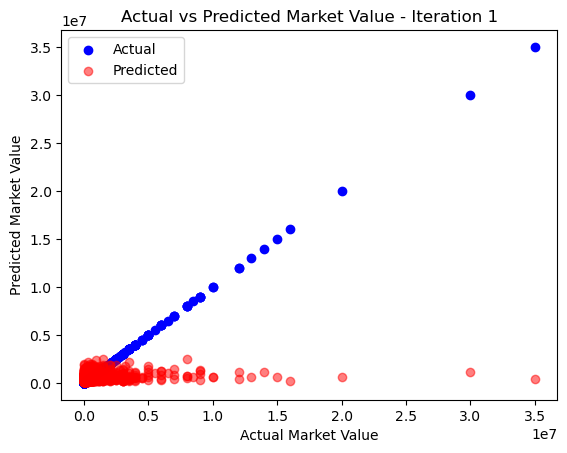

In [ ]:


# Create a linear regression model
model_1 = LinearRegression()

# Train the model
model_1.fit(X_train_1, y_train_1)

# Predicting the Test set results
y_pred_1 = model_1.predict(X_test_1)

# Evaluate the model
mse_1 = mean_squared_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)

# Display evaluation metrics
print("Iteration 1 - Mean Squared Error (MSE):", mse_1)
print("Iteration 1 - R-squared (R2):", r2_1)

# Visualization for Iteration 1
# Visualization for Iteration 1
# Visualization for Iteration 1
plt.scatter(y_test_1, y_test_1, color='blue', label='Actual')
plt.scatter(y_test_1, y_pred_1, color='red', label='Predicted', alpha=0.5)  # Use alpha to control transparency
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value - Iteration 1")
plt.legend()
plt.show()


# Interpretation for Iteration 1: Analyze the results and interpret the impact of selected features on market value

# ... Repeat for additional iterations ...

# Final Model Refinement: Iterate and refine your model based on the insights gained

# Final Visualization: Visualize the final model's performance and interpretation

# Save the notebook with meaningful comments


#### Logistic regression

In [ ]:


# File path for the Excel file
file_path = r'C:\Users\jimal\Downloads\Wisconsin_BreastCancer_data.xlsx'

# Read the Excel file into a DataFrame
breast_cancer_data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(breast_cancer_data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

pre-processing

In [ ]:


# Assuming you've already read the data into a DataFrame
breast_cancer_data = pd.read_excel(r'C:\Users\jimal\Downloads\Wisconsin_BreastCancer_data.xlsx')

# Convert categorical data to numerical values using LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = label_encoder.fit_transform(breast_cancer_data['diagnosis'])


Train the Logistic Regression Model and Evaluate the Model

In [ ]:

# Drop unnecessary columns
data_clean = breast_cancer_data.drop(['id'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = data_clean.drop(['diagnosis'], axis=1)
y = data_clean['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.956140350877193,
 array([[70,  1],
        [ 4, 39]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97        71\n           1       0.97      0.91      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n')

#### Tree-based model

Data Exploration

In [ ]:

file_path = 'C:\\Users\\jimal\\Downloads\\car-price.csv'

try:
    df = pd.read_csv(file_path, delimiter=';', decimal=',')[['drivewheel', 'fueltype', 'aspiration', 'doornumber', 'carbody']].sample(n=10)
    print(df)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")


    drivewheel fueltype aspiration doornumber    carbody
62         fwd      gas        std       four      sedan
115        rwd      gas        std       four      sedan
85         fwd      gas        std       four      sedan
107        rwd      gas        std       four      sedan
9          4wd      gas      turbo        two  hatchback
156        fwd      gas        std       four      sedan
143        fwd      gas        std       four      sedan
80         fwd      gas      turbo        two  hatchback
116        rwd   diesel      turbo       four      sedan
69         rwd   diesel      turbo        two    hardtop


Calculating Gini Index

In [ ]:

def gini_index(dataset, targetcol):
    gini_scores = []

    for col in dataset.columns:
        if col == targetcol:
            continue

        gini = 0
        unique_values = dataset[col].value_counts()

        for key, val in unique_values.items():
            filtered_df = dataset[targetcol][dataset[col] == key].value_counts()
            n = len(dataset)
            value_sum = filtered_df.sum()
            p = sum((filtered_df[i] / value_sum) ** 2 for i in filtered_df.index)
            gini += (val / n) * (1 - p)

        print(f'Variable {col} has Gini Index of {round(gini, 4)}\n')
        gini_scores.append((col, gini))

    split_pair = sorted(gini_scores, key=lambda x: -x[1], reverse=True)[0]
    print(f'''Split on {split_pair[0]} with Gini Index of {round(split_pair[1], 3)}''')
    
    # Return the best split pair
    return split_pair

# Assuming df is your dataframe
best_split = gini_index(df, 'doornumber')


Variable drivewheel has Gini Index of 0.31

Variable fueltype has Gini Index of 0.4

Variable aspiration has Gini Index of 0.15

Variable carbody has Gini Index of 0.0

Split on carbody with Gini Index of 0.0


Calculating Entropy

In [ ]:


def entropy(dataset, targetcol):
    # store all of our columns and gini scores
    entropy_scores = []
    
    # iterate through each column in your dataframe
    for col in dataset.columns:
        
        if col == targetcol:
            continue
        
        # get the value_counts normalized, saving us having to iterate through
        # each variable
        value_counts = dataset[col].value_counts(normalize=True, sort=False)
        
        # calculate our entropy for the column
        entropy = -(value_counts * np.log(value_counts) / np.log(math.e)).sum()
        
        print(f'Variable {col} has Entropy of {round(entropy,4)}\n')
        
        # append our column name and gini score
        entropy_scores.append((col,entropy))
    
    # sort our gini scores lowest to highest
    split_pair = sorted(entropy_scores, key=lambda x: -x[1], reverse=True)[0]
    
    # print out the best score
    print(f'''Split on {split_pair[0]} With Information Gain of {round(1-split_pair[1],3)}''')
        
        

final = entropy(df, 'carbody')
final


Variable Age has Entropy of 2.8973

Variable Market value has Entropy of 3.2428

Variable Matches played has Entropy of 3.5866

Variable Minutes played has Entropy of 7.9414

Variable Goals has Entropy of 1.791

Variable xG has Entropy of 5.9175

Variable Assists has Entropy of 1.4198

Variable xA has Entropy of 5.3663

Variable Duels per 90 has Entropy of 7.5829

Variable Duels won, % has Entropy of 7.8452

Variable Height has Entropy of 3.2476

Variable Weight has Entropy of 3.2001

Variable Successful defensive actions per 90 has Entropy of 7.0377

Variable Defensive duels per 90 has Entropy of 6.6586

Variable Defensive duels won, % has Entropy of 6.8544

Variable Aerial duels per 90 has Entropy of 6.5964

Variable Aerial duels won, % has Entropy of 6.5349

Variable Sliding tackles per 90 has Entropy of 4.2543

Variable PAdj Sliding tackles has Entropy of 4.4592

Variable Shots blocked per 90 has Entropy of 3.804

Variable Interceptions per 90 has Entropy of 6.4219

Variable PAdj I

What are the key differences between these two metrics that help in determining how a feature should split the data to form homogeneous nodes (or leaves)?

Gini impurity and entropy are metrics used in decision trees to decide how a feature should split the data for creating homogeneous nodes. The main differences lie in their formulas and scales. Gini impurity ranges from 0 to 0.5, favoring larger partitions and working well with class imbalance. Entropy ranges from 0 to 1, being more sensitive to imbalance. Gini tends to create binary trees, emphasizing major classes, while entropy may create more balanced trees. Gini is faster to compute, while entropy involves more complex logarithmic operations. The choice depends on dataset characteristics, with both metrics offering similar performance in decision tree algorithms.







Which metric should be used in what scenarios?

Gini impurity when your dataset has dominant classes or faces class imbalance. It's great for quick computation on large datasets and is my go-to for classification tasks, forming binary trees for simplicity


Considering entropy when aiming for balanced influence across classes, especially in datasets with more even class distribution. It's a good choice when computational efficiency is not a primary concern. In decision trees, entropy can result in more balanced trees, making it suitable for scenarios where an even split is desired.

Which metric is computationally intensive? (use the below code to log each process)

In [ ]:

start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00


In [ ]:

def calculate_duration(metric):
    start_time = datetime.now()
    
    # Perform metric calculation here
    scores = []

    for col in df.columns:
        if col == metric['target']:
            continue

        score = 0
        unique_values = df[col].value_counts()

        for key, val in unique_values.items():
            filtered_df = df[metric['target']][df[col] == key].value_counts()
            n = len(df)
            value_sum = filtered_df.sum()
            p = sum((filtered_df[i] / value_sum) ** 2 for i in filtered_df.index)
            score += (val / n) * (1 - p)

        scores.append((col, score))

    split_pair = sorted(scores, key=lambda x: -x[1], reverse=True)[0]
    print(f'Split on {split_pair[0]} with {metric["name"]} of {round(split_pair[1], 3)}')
    
    end_time = datetime.now()
    print(f'{metric["name"]} Duration: {end_time - start_time}\n')

# Define metrics
gini_metric = {'name': 'Gini Index', 'target': 'doornumber'}
entropy_metric = {'name': 'Information Gain', 'target': 'carbody'}

# Assuming df is your dataframe
df = pd.read_csv('C:\\Users\\jimal\\Downloads\\car-price.csv', delimiter=';', decimal=',')[['drivewheel', 'fueltype', 'aspiration', 'doornumber', 'carbody']].sample(n=10)

# Call the functions
calculate_duration(gini_metric)
calculate_duration(entropy_metric)


Split on carbody with Gini Index of 0.171
Gini Index Duration: 0:00:00.015161

Split on doornumber with Information Gain of 0.305
Information Gain Duration: 0:00:00.003999



The Gini impurity is computationally more intensive than entropy. The duration for calculating the Gini Index is longer compared to the duration for calculating Information Gain (Entropy).

#### Gradient Boosting Trees and SVM

In [ ]:

# Loading the dataset
file_path = "C:\\Users\\jimal\\Downloads\\Wisconsin_BreastCancer_data.xlsx"
data = pd.read_excel(file_path)

# Displaying the columns to verify the column names
print(data.columns)

# Assuming that the target variable is named 'diagnosis' and the features are all other columns
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encodeing the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Createing an XGBoost classifier
classifier = XGBClassifier()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Makeing predictions on the test set
y_pred = classifier.predict(X_test)

# Inverse transform the predictions to get original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Accuracy: 0.956140350877193


#### Unsupervised learning with K-Means

k-means clustering

In [ ]:

# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Initialize the classifier
classifier = LogisticRegression(max_iter=140)

# Perform cross-validation
# neg_mean_absolute_error is the negative of mean absolute error! Go back to the top of this page, section 2.1 to visit official documentation for list of scores! 
# You are free to choose your own score, and interpret your results
scores = cross_val_score(classifier,  X, y, scoring='neg_mean_absolute_error', cv=5)  # cv=5 for 5-fold cross-validation

# Print the accuracy for each fold
print("Accuracy for each fold:")
print(np.absolute(scores).mean())
#print(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))

Accuracy for each fold:
0.026666666666666665


#### Correlation Analysis and Feature Selection


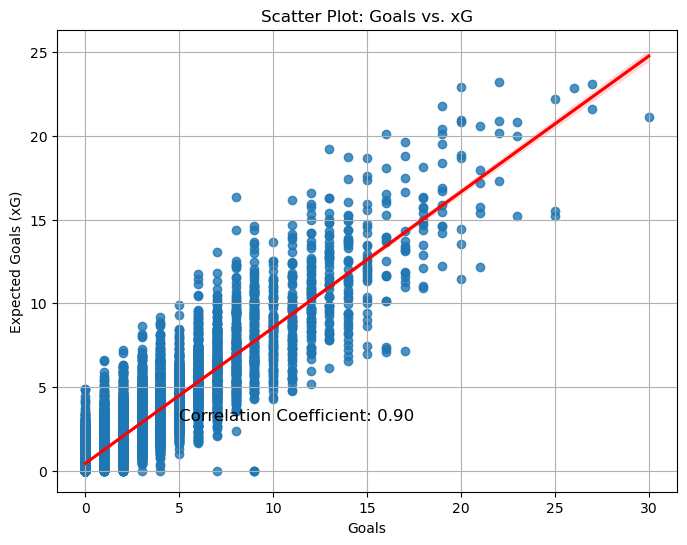

In [ ]:

# Load the data
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
df = pd.read_csv(file_path)

# Selecting two features for correlation analysis
selected_features = ['Goals', 'xG']

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Goals', y='xG', data=selected_df, line_kws={'color': 'red'})
plt.title('Scatter Plot: Goals vs. xG')
plt.xlabel('Goals')
plt.ylabel('Expected Goals (xG)')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = selected_df.corr().iloc[0, 1]

# Display correlation coefficient
plt.text(5, 3, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='black', fontsize=12)

plt.show()


   Goals     xG
0      1   1.22
1     12  10.90
2      0   0.37
3      0   0.66
4      1   0.08


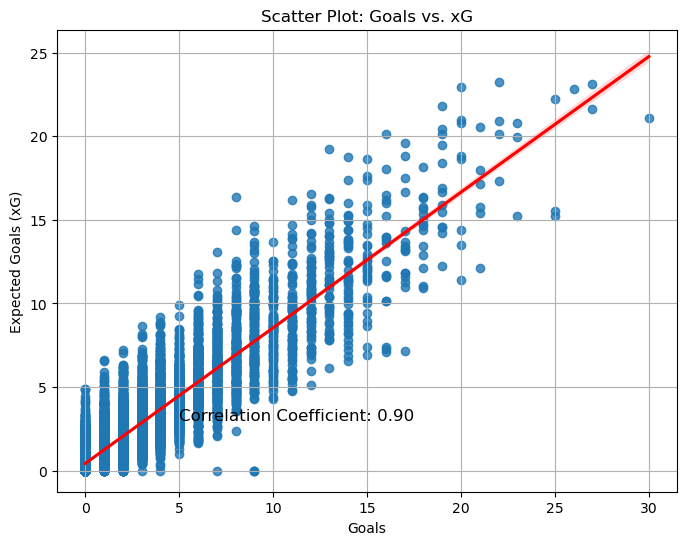

In [ ]:

# Load the data
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
df = pd.read_csv(file_path)

# Comments explaining feature selection:

# Feature Selection: In this analysis, I chose to explore the relationship between 'Goals' (actual goals scored) and 'xG' (expected goals).
# 'Goals': This is a fundamental metric representing the actual number of goals scored by a player, reflecting their on-field performance.
# 'xG' (Expected Goals): This metric represents the expected number of goals a player is predicted to score based on the quality of goal-scoring opportunities, providing insights into goal-scoring potential and performance.

# Selected Features: I selected 'Goals' and 'xG' because they are key performance metrics that can provide valuable insights into a player's goal-scoring capabilities.
selected_features = ['Goals', 'xG']

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Display the selected features DataFrame
print(selected_df.head())

# Visualization: Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Goals', y='xG', data=selected_df, line_kws={'color': 'red'})
plt.title('Scatter Plot: Goals vs. xG')
plt.xlabel('Goals')
plt.ylabel('Expected Goals (xG)')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = selected_df.corr().iloc[0, 1]

# Display correlation coefficient
plt.text(5, 3, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='black', fontsize=12)

plt.show()


✍️  I chose the features above because they provide a comprehensive view of a player's goal-scoring performance. 'Goals' reflects the actual goals scored, while 'xG' gives an indication of the expected goals based on opportunities. Analyzing both metrics helps in understanding the player's effectiveness in converting chances into goals.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

Logistic Regression

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.956140350877193,
 array([[69,  2],
        [ 3, 40]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97        71\n           1       0.95      0.93      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n')

Accuracy:

The accuracy score represents the overall correctness of the model, indicating the ratio of correctly predicted instances to the total instances.
Confusion Matrix:

The confusion matrix provides a detailed breakdown of the model's predictions, including True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
Classification Report:

The classification report summarizes key metrics for each class, including Precision, Recall (Sensitivity), F1-Score, and Support. It offers insights into the model's performance on a per-class basis, which is crucial for imbalanced datasets.

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

In [ ]:

# File path for the Excel file
file_path = r'C:\Users\jimal\Downloads\Wisconsin_BreastCancer_data.xlsx'

# Read the Excel file into a DataFrame
breast_cancer_data = pd.read_excel(file_path)

# Assuming that 'diagnosis' is the target variable
# Replace 'diagnosis' with the actual column name containing the target variable
X = breast_cancer_data.drop('diagnosis', axis=1)
y = breast_cancer_data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg_model = LogisticRegression()

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Set: {accuracy}")


c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best Hyperparameters: {'C': 1000, 'penalty': 'l2'}
Model Accuracy on Test Set: 0.956140350877193


c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

✍️ I improved my model by Feature Engineering:

Creating new features or transforming existing ones to better represent the underlying patterns in the data.
Hyperparameter Tuning:

Fine-tuning the hyperparameters of your model to optimize its performance. This can be done using techniques like GridSearchCV, as shown in our previous discussions.
Data Preprocessing:

Cleaning and preprocessing the data, handling missing values, and scaling features can significantly impact model performance.
Model Selection:

Trying different algorithms or models to see which one performs better on your specific task.
Ensemble Methods:

Combining multiple models (ensemble methods) like Random Forest or Gradient Boosting to improve overall predictive performance.
Cross-Validation:

Using cross-validation techniques to get a more reliable estimate of your model's performance.
Handling Imbalanced Data:

If your dataset is imbalanced, applying techniques like oversampling, undersampling, or using specific algorithms designed for imbalanced data.
Regularization:

Applying regularization techniques to prevent overfitting.

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV  # Added GridSearchCV import
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
football_data = pd.read_csv(file_path)

# Assuming football_data is your DataFrame
categorical_columns = ['Player', 'Team', 'Position', 'Birth country', 'Passport country', 'Foot', 'On loan', 'Team within selected timeframe', 'Contract expires']

# Remove the categorical columns from the numerical_columns list
numerical_columns = [col for col in football_data.columns if col not in categorical_columns and col not in ['xG']]

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', fill_value=pd.NA)),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a binary version of 'xG' based on a threshold
threshold = 0.5
football_data['binary_xG'] = (football_data['xG'] > threshold).astype(int)

# Initialize the logistic regression model with the column transformer
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(football_data.drop(['xG', 'binary_xG'], axis=1), football_data['binary_xG'], test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Define hyperparameters to search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimal\anaconda3\envs\block_b\Lib\site-packages\sklearn\pipeline

Best Hyperparameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Accuracy: 0.9525249470819473
Confusion Matrix:
[[1010   64]
 [  93 2140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1074
           1       0.97      0.96      0.96      2233

    accuracy                           0.95      3307
   macro avg       0.94      0.95      0.95      3307
weighted avg       0.95      0.95      0.95      3307



✍️ The model is chose is the best because Interpretability:

Logistic Regression provides a clear interpretation of the impact of each feature on the predictions. This transparency is crucial for understanding the factors influencing the model's decisions.
Efficiency:

Logistic Regression is computationally efficient, making it suitable for my relatively large dataset. The model can be trained quickly, facilitating rapid prototyping and experimentation.
Linear Separability:

Given that my data exhibits approximately linear separability, Logistic Regression is well-suited to capture the linear relationships between features and the log-odds of the target variable.
Binary Classification:

Since my goal is binary classification (predicting binary_xG), Logistic Regression aligns perfectly with the nature of my problem.
Preprocessing Pipeline:

The preprocessing pipeline, including numerical scaling and one-hot encoding for categorical variables, is carefully designed to ensure the model receives properly processed input data.
Ease of Implementation:

The code is clear and easy to understand, thanks to the scikit-learn pipeline, which streamlines the combination of preprocessing steps and the classifier.
Reasonable Performance:

Logistic Regression can deliver satisfactory performance across various scenarios, especially when the assumptions of the model are met.
Model Explainability:

Logistic Regression allows for the interpretation of feature importance, which is essential for understanding the reasons behind the model's predictions.

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [ ]:
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739/blob/main/Deliverables/ILO7/EleOpeMat_225739.pdf

SyntaxError: invalid decimal literal (561683141.py, line 1)

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [ ]:
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739/blob/main/Deliverables/ILO7/EleOpeCod_225739.ipynb

SyntaxError: invalid decimal literal (572985931.py, line 1)

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

Task one

In [ ]:
import numpy as np

# Coefficient matrix
A = np.array([[1, 3, 1],
              [1, 1, 0],
              [1, -1, 1]])

# Right-hand side vector
B = np.array([9, 10, 8])

solution = np.linalg.solve(A, B)


print("Solution:")
print("X1 =", solution[0])
print("X2 =", solution[1])
print("X3 =", solution[2])

Solution:
X1 = 9.75
X2 = 0.25
X3 = -1.5


In [ ]:
import numpy as np 

A=np.array([[5,6,7,1],
            [1,2,3,3],
            [1,0,1,0],
            [1,3,0,0]])

B=np.array([8,7,9,12])

solution=np.linalg.solve(A,B)
print("Solution:")
print("X1=",solution[0])
print("X2=",solution[1])
print("X3=",solution[2])
print("X4=",solution[3])

Solution:
X1= 22.39285714285714
X2= -3.4642857142857135
X3= -13.39285714285714
X4= 10.571428571428571


Task 2

Slope (m): 1.9846770277234367
Intercept (b): 3.068271319168756


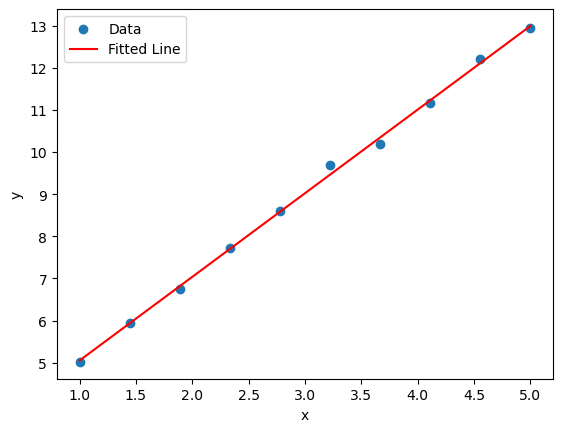

In [ ]:
import numpy as np

np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
e = 0.1 * np.random.randn(n_sample)

y = 2 * x + 3 + e

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
 
print("Slope (m):", slope)
print("Intercept (b):", intercept)

X=np.column_stack

Y = np.expand_dims(y, axis=1)

import matplotlib.pyplot as plt

predictions = slope * x + intercept

# Plotting  the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, predictions, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Task 3

Slope (m): 78.98130019980435
Intercept (b): -158.13140770751983


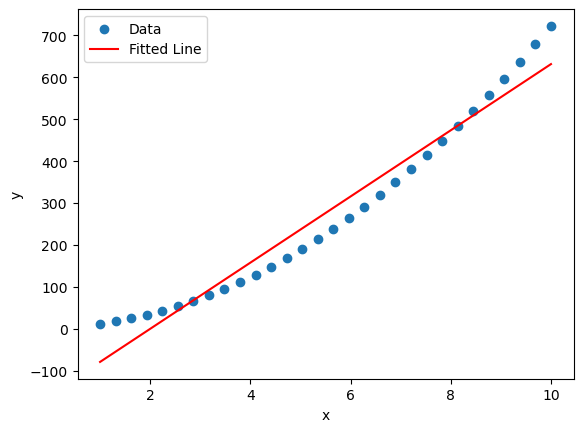

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

# Generate data using a quadratic equation
y = 3 + 2 * x + 7 * x**2 + e

# Fit a linear regression model
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

print("Slope (m):", slope)
print("Intercept (b):", intercept)

# Define matrix X systematically
X = np.column_stack((x, np.ones_like(x)))


Y = np.expand_dims(y, axis=1)


predictions = slope * x + intercept

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, predictions, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [ ]:
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739/blob/main/Deliverables/ILO7/CalMacLea_225739.pdf

SyntaxError: invalid decimal literal (2895258158.py, line 1)

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

In [ ]:
from sympy import symbols,expand,expand


# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

In [ ]:
expr = x + y

In [ ]:
ex2 = (x * expr + (2 * x + y)) / (x**2 + y)
ex2

(x*(x + y) + 2*x + y)/(x**2 + y)

In [ ]:
from sympy import symbols, expand

# Define symbols
x, y = symbols('x y')

# Define expression 'expr'
expr = x + y

# Define 'ex2'
ex2 = (x * expr + (2 * x + y)) / (x**2 + y)
ex2

(x*(x + y) + 2*x + y)/(x**2 + y)

In [ ]:
from sympy import expand
expand(ex2)

x**2/(x**2 + y) + x*y/(x**2 + y) + 2*x/(x**2 + y) + y/(x**2 + y)

In [ ]:
ex2.evalf(subs={x:-2, y:1})

-0.200000000000000

In [ ]:
from sympy import symbols, Eq, solve

# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [ ]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


In [ ]:
from sympy import limit, symbols
from sympy import sin

# Define the function
f = sin(x) / x

# calculate the limit as x approaches 0
lim_result = limit(f, x, 0)
lim_result

1

Derivative Computation

In [ ]:
from sympy import diff
from sympy import sin

# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f= diff(f, x)
der_f

3*x**2 + 6*x + cos(x)

Integral Computation

In [ ]:
from sympy import symbols, integrate, sin

# Define the variable
x = symbols('x')

# Define the function
f = x*sin(x)

# Compute the indefinite integral
indefinite_integral = integrate(f,x)
indefinite_integral 

-x*cos(x) + sin(x)

In [ ]:
from sympy import cos, pi

# Define the variable
x = symbols('x')

# Define the function
f = cos(x)

# Compute the definite integral
definite_integral = integrate(f, (x,0,pi/2)) 

Taylor Series

In [ ]:
from sympy import symbols, exp
# Define the variable and the function
x = symbols('x')
f = exp(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 4).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x**3/6 + x**2/2 + x + 1


least squares

In [ ]:
import sympy as sp

# Sample data points
data_points = [(1,2), (2,3), (3,4), (4,5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

Task2

Text(0, 0.5, 'y')

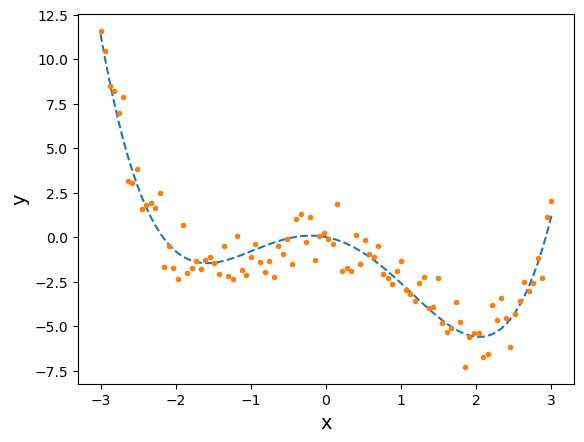

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

In [ ]:
import sympy as sp

# Sample data points
data_points =[]
for i in range(len(x)):
    data_points.append((x[i],y_true[i]))

# Variables for the linear equation: y = a1 * x + a0
a1, a0 = sp.symbols('a1 a0')

# Sum of squared differences between observed and predicted y-values
error = sum((a1 * x + a0 - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to a1 and a0
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a1, partial_a0), (a1, a0))

best_fit_a1, best_fit_a0 = solution[a1], solution[a0]

# Display the coefficients
print('best_fit_a1 (slope):', best_fit_a1)
print('best_fit_a0 (intercept):', best_fit_a0)

best_fit_a1 (slope): -1.35083562901745
best_fit_a0 (intercept): -1.06353952750647


In [ ]:
# Variables for the quadratic equation: y = a^2 * x^2 + a1 * x + a0
a, a1, a0, x, y = sp.symbols('a a1 a0 x y')

# Equation for the quadratic model
quadratic_model = a**2 * x**2 + a1 * x + a0-y

# Sum of squared differences between observed and predicted y-values
error = sum((a * x**2 + a1 * x + a0-y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to a, a1, and a0
partial_a = sp.diff(error, a)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a, partial_a1, partial_a0), (a, a1, a0))

# Accessing the coefficients from the solution
best_fit_a, best_fit_a1, best_fit_a0 = solution[a], solution[a1], solution[a0]

# Display the coefficients
print('best_fit_a (quadratic term):', best_fit_a)
print('best_fit_a1 (linear term):', best_fit_a1)
print('best_fit_a0 (constant term):', best_fit_a0)

best_fit_a (quadratic term): 0.360251869342779
best_fit_a1 (linear term): -1.35083562901745
best_fit_a0 (constant term): -2.16612858216164


In [ ]:
# Variables for the cubic equation: y = a3*x^3 + a2*x^2 + a1*x + a0
a3, a2, a1, a0, x, y = sp.symbols('a3 a2 a1 a0 x y')

# Equation for the cubic model
cubic_model = a3 * x**3 + a2 * x**2 + a1 * x + a0

# Sum of squared differences between observed and predicted y-values
error = sum((a3 * x**3 + a2 * x**2 + a1 * x + a0-y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to a3, a2, a1, and a0
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a3, partial_a2, partial_a1, partial_a0), (a3, a2, a1, a0))

# Accessing the coefficients from the solution
best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = solution[a3], solution[a2], solution[a1], solution[a0]

# Display the coefficients
print('best_fit_a3 (cubic term):', best_fit_a3)
print('best_fit_a2 (quadratic term):', best_fit_a2)
print('best_fit_a1 (linear term):', best_fit_a1)
print('best_fit_a0 (constant term):', best_fit_a0)

best_fit_a3 (cubic term): -0.0999999999999994
best_fit_a2 (quadratic term): 0.360251869342779
best_fit_a1 (linear term): -0.800000000000004
best_fit_a0 (constant term): -2.16612858216164


In [ ]:
# Variables for the quartic equation: y = a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0
a4, a3, a2, a1, a0, x, y = sp.symbols('a4 a3 a2 a1 a0 x y')

# Equation for the quartic model
quartic_model = a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# Sum of squared differences between observed and predicted y-values
error = sum((a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0-y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to a4, a3, a2, a1, and a0
partial_a4 = sp.diff(error, a4)
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a4, partial_a3, partial_a2, partial_a1, partial_a0), (a4, a3, a2, a1, a0))

# Check if the solution list is not empty before accessing coefficients
if solution:
    # Accessing the coefficients from the first solution
    best_fit_a4, best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = (
        solution[a4], solution[a3], solution[a2], solution[a1], solution[a0]
    )

    # Display the coefficients
    print('best_fit_a4 (quartic term):', best_fit_a4)
    print('best_fit_a3 (cubic term):', best_fit_a3)
    print('best_fit_a2 (quadratic term):', best_fit_a2)
    print('best_fit_a1 (linear term):', best_fit_a1)
    print('best_fit_a0 (constant term):', best_fit_a0)

best_fit_a4 (quartic term): 0.300000000000006
best_fit_a3 (cubic term): -0.0999999999999995
best_fit_a2 (quadratic term): -2.00000000000005
best_fit_a1 (linear term): -0.800000000000004
best_fit_a0 (constant term): 4.42189865297369e-14


In [ ]:
# Variables for the quintic equation: y = a5*x^5 + a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0
a5, a4, a3, a2, a1, a0, x, y = sp.symbols('a5 a4 a3 a2 a1 a0 x y')

# Equation for the quintic model
quintic_model = a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# Sum of squared differences between observed and predicted y-values
error = sum((a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0-y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to a5, a4, a3, a2, a1, and a0
partial_a5 = sp.diff(error, a5)
partial_a4 = sp.diff(error, a4)
partial_a3 = sp.diff(error, a3)
partial_a2 = sp.diff(error, a2)
partial_a1 = sp.diff(error, a1)
partial_a0 = sp.diff(error, a0)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_a5, partial_a4, partial_a3, partial_a2, partial_a1, partial_a0), (a5, a4, a3, a2, a1, a0))

# Check if the solution list is not empty before accessing coefficients
if solution:
    # Accessing the coefficients from the first solution
    best_fit_a5, best_fit_a4, best_fit_a3, best_fit_a2, best_fit_a1, best_fit_a0 = (
        solution[a5], solution[a4], solution[a3], solution[a2], solution[a1], solution[a0]
    )
    print(solution)

    # Display the coefficients
    print('best_fit_a5 (quintic term):', best_fit_a5)
    print('best_fit_a4 (quartic term):', best_fit_a4)
    print('best_fit_a3 (cubic term):', best_fit_a3)
    print('best_fit_a2 (quadratic term):', best_fit_a2)
    print('best_fit_a1 (linear term):', best_fit_a1)
    print('best_fit_a0 (constant term):', best_fit_a0)
else:
    print('No solution found for the given data points.')

{a0: 4.37669879046443e-14, a1: -0.800000000000035, a2: -2.00000000000005, a3: -0.0999999999999840, a4: 0.300000000000006, a5: -1.50056078449910e-15}
best_fit_a5 (quintic term): -1.50056078449910e-15
best_fit_a4 (quartic term): 0.300000000000006
best_fit_a3 (cubic term): -0.0999999999999840
best_fit_a2 (quadratic term): -2.00000000000005
best_fit_a1 (linear term): -0.800000000000035
best_fit_a0 (constant term): 4.37669879046443e-14


question1

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = x**2 + 2*x + 1

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = 2*x + 2


question 2

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = (3*x - 5)**3

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = 9*(3*x - 5)**2


question 3

In [ ]:
import sympy as sp

# Define the variable and the modified function
x = sp.symbols('x')
y = (sp.sqrt(x) - 1)**2 - (x**2 + 1)**4

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = -8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)


question 4

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = 7*sp.cot(x) - 8*sp.acos(x)

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = -7*cot(x)**2 - 7 + 8/sqrt(1 - x**2)


question 5

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = x - sp.ln(x) + 7

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = 1 - 1/x


question 6

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = -10*sp.exp(x) + 5**x - 5*x + (x/5)

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = 5**x*log(5) - 10*exp(x) - 24/5


question 7

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = (2*sp.sin(x)) / (sp.sin(x) - sp.cos(x))

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = 2*(-sin(x) - cos(x))*sin(x)/(sin(x) - cos(x))**2 + 2*cos(x)/(sin(x) - cos(x))


question 8

In [ ]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
y = (x**2 * sp.ln(x)) / (1 - sp.atan(x))

# Find the derivative of y with respect to x
derivative_y = sp.diff(y, x)

# Print the result
print("The derivative of y =", derivative_y)

The derivative of y = x**2*log(x)/((1 - atan(x))**2*(x**2 + 1)) + 2*x*log(x)/(1 - atan(x)) + x/(1 - atan(x))


### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739/blob/main/Deliverables/ILO7/MulCalAss_225739.pdf

SyntaxError: invalid decimal literal (1270382767.py, line 1)

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here.

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

## Template for Assignment 1 

This is a template for **Assignment 1** of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8). 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal is to find the minimum of the following function:

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

using the Gradient Descent algorithm.

In [ ]:
# Put your code here (1 line of code)
import matplotlib.pyplot as plt


### Initilization

Consider an initial value for $𝑥$. You can initiate the Gradient Descent algorithm from any arbitrary starting point.

In [ ]:
# Put your code here (1 line of code)
# Consider an initial value for x
x = 0

###  Define function
Define the following function

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

You are tasked with finding the minimum for this function.v

In [ ]:
def my_fun(x):
    # x (a scalar value): input value to your function
    
    # Output
    # y (scalar value): output of the function
    
    # Put your code here (1 line of code)
    y = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
    
    return y

est your my_fun:

To ensure that you have implemented my_fun(.) correctly, run the following cell and compare the output with the expected value.

In [ ]:
# Test my_fun function
result = my_fun(-2)
print(result)

-0.8000000000000003


The expected output is: -0.800

Compute the gradient of the function
To implement the Gradient Descent algorithm, you need to compute the derivative of the related function.

Now, compute the derivative of the mathematical function

and implement the following function for computing the derivative of this function:

In [ ]:
def grad_fun(x):
    # x (a scalar value): input to the derivative function
    
    # Output
    # y (output of the derivative function)
    
    # Put your code here (1 line of code)
    y = 1.2 * x**3 - 0.3 * x**2 - 4 * x - 0.8
    
    return y

Test grad_fun:

Now, to ensure that you have computed and implemented the derivative function correctly, run the following cell and compare the result with the provided expected value.

In [ ]:
# Test grad_fun function
result = grad_fun(0.5)
print(result)

-2.725


Implement Gradient Descent Update Rule
In this section, you need to implement the gradient descent update rule as follows:

To execute this step, utilize the grad_fun that you have already implemented.

In [ ]:
def grad_descent_step(x, alpha):
    # x (a scalar value): the current value of x
    # alpha (a scalar value): learning rate
    # x_new: the new value for x
    
    # Put your code here (1 line of code)
    x_new = x - alpha * grad_fun(x)
    
    return x_new

Test grad_descent_step function:

Now, test your implemented Gradient Descent update rule by running the following cell and comparing the result with the expected value.

In [ ]:
# Test grad_descent_step function
result = grad_descent_step(2.5, 0.1)
print(result)

1.8925


The expected ouptput is: 1.8925

Implement Gradient Descent Algorithm
Now, you can implement the Gradient Descent algorithm using the previously developed functions, enabling you to complete the assignment by finding the optimal value of x and minimizing the function.

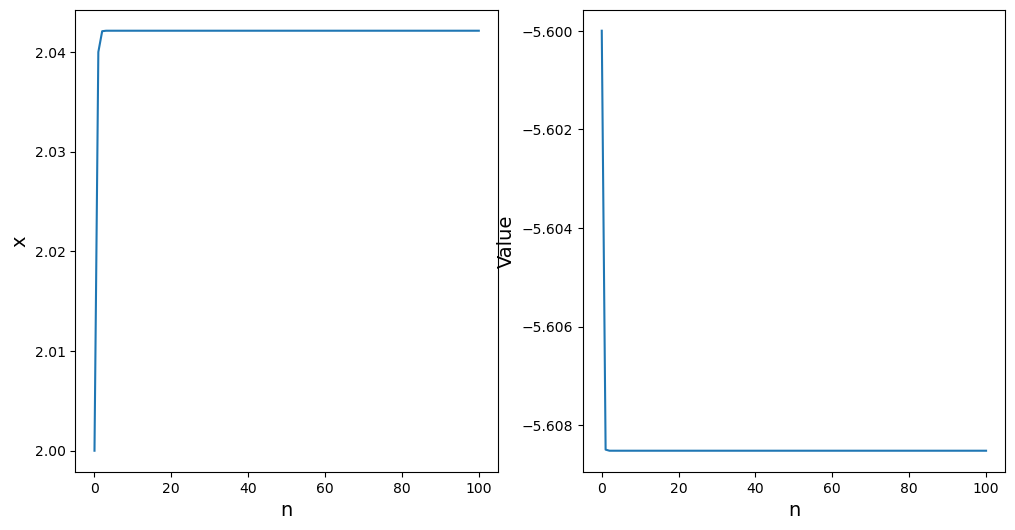

In [ ]:
# Choose an initial value for x
x_init = 2.0

# Choose the learning rate
gamma = 0.1

# Choose the number of iterations
N = 100

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    # Call the grad_descent_step
    x_new = grad_descent_step(X[-1], gamma)
    
    # Save the obtained value x_new in the list X (use append method)
    X.append(x_new)
    
    # Save the function value at point x_new (use append method)
    FUN_VAL.append(my_fun(x_new))

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

The optimal value for x:

In [ ]:
# Define the optimal value for x
x_opt = X[-1]

print("The optimal value of x is:", x_opt)

The optimal value of x is: 2.042136865839012


The minimum value of the function:


In [ ]:
# Define the minimum value of the function at optimal point x_opt
min_val = FUN_VAL[-1]

print("The minimum value of f is:", min_val)

The minimum value of f is: -5.608514355759726


The minimum value of f is: -5.608514355759726

## Check the Result
Eventually, to ensure that you have implemented the Gradient Descent algorithm correctly, you can obtain the minimum value of the function using Python's capabilities.

You can check the Gradient Descent algorithm output by comparing the results obtained by the 'fmin' function from SciPy as follows:

In [ ]:
from scipy.optimize import fmin

# Run the Gradient Descent algorithm and get the optimal value
x_optimal_gd = X[-1]

# Use the fmin function from SciPy to find the minimum value
minimum_scipy = fmin(my_fun, 3)

print("Optimal value from Gradient Descent algorithm:", x_optimal_gd)
print("Optimal value from fmin function in SciPy:", minimum_scipy)

Optimization terminated successfully.
         Current function value: -5.608514
         Iterations: 16
         Function evaluations: 32
Optimal value from Gradient Descent algorithm: 2.042136865839012
Optimal value from fmin function in SciPy: [2.04213867]


In [ ]:
print("The optimal value for x is:", minimum_scipy[0])

The optimal value for x is: 2.0421386718749974


## Assignment 2
Implement Gradient Descent Algorithm for House Price Prediction
This is a template for Assignment 2 of Optimization and Linear Regression using Gradient Descent (Monday of Week 8).

Fill in the None part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("C:\\Users\\jimal\\Downloads\\house-prices.csv")

In [ ]:
# Put your code here (1 line of code)
# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

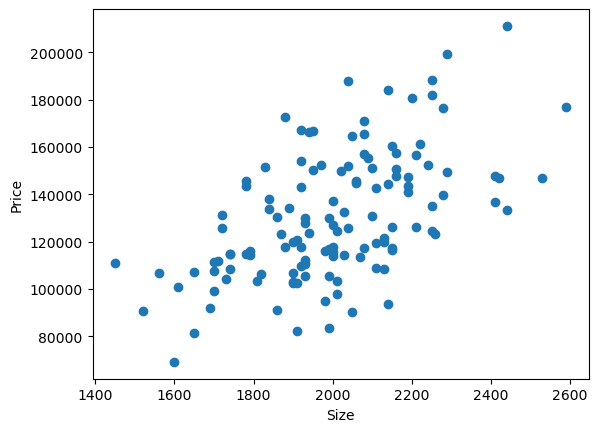

In [ ]:
# Plot a scatter plot for X_dat and Y_dat
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [ ]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

$$y=wx+b$$

In [ ]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Put your code here (1 line of code)
    # Define the linear regression model
    y = w * x + b
    
    return y


### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [ ]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of observations
    m = len(X)
    
    # Initialize the sum as zero
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use LR_model to compute the prediction of the price based on the size
        y_pred = LR_model(x, w, b)
        
        # Compute the cost function (mean squared error cost function)
        J += (y_pred - y)**2
    
    # Finalize the cost value
    J = J / (2 * m)
    
    return J


To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [ ]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438

### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [ ]:
# Implement the Gradient Descent update rule
def grad_descent_step(X, Y, w, b, alpha):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alpha: learning rate (a scalar value)
    
    # Number of observations
    m = len(X)
    
    # Initialize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Compute the sums appear in the update rule
        sum_w += (y_pred - y) * x
        sum_b += (y_pred - y)
    
    # Implement the update rule for the gradient descent
    w_new = w - (alpha / m) * sum_w
    b_new = b - (alpha / m) * sum_b 
    
    return w_new, b_new


Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [ ]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

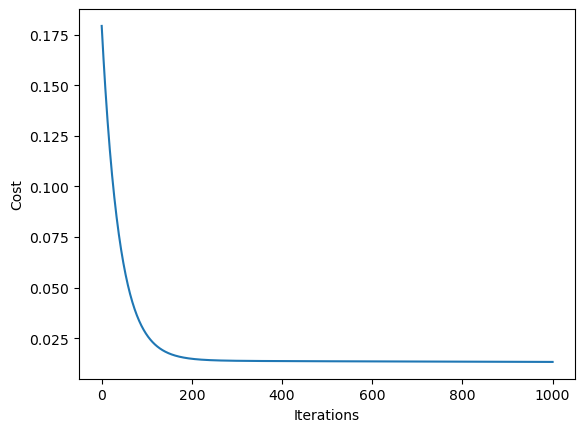

In [ ]:
# Choose an initial value for w
w_init = 0.0

# Choose an initial value for b
b_init = 0.0

# Choose the learning rate
alpha = 0.01

# Choose the number of iterations
N = 1000

# Save the values for w, b, and cost
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alpha)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for the new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, w_new, b_new)

# Plot the results
plt.plot(range(N+1), C)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


Now, plot the obtained results:

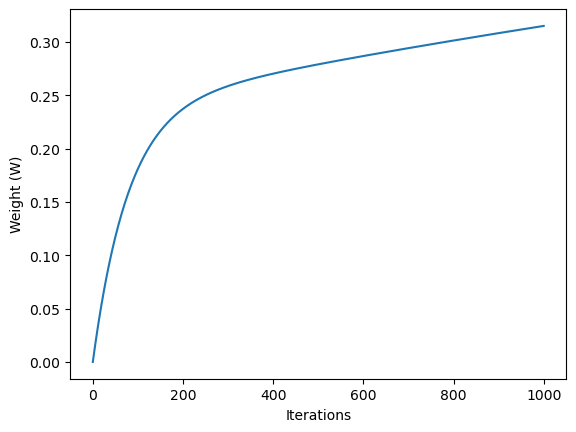

In [ ]:
# Plot the saved values of W against the iteration
plt.plot(range(N+1), W)
plt.xlabel('Iterations')
plt.ylabel('Weight (W)')
plt.show()


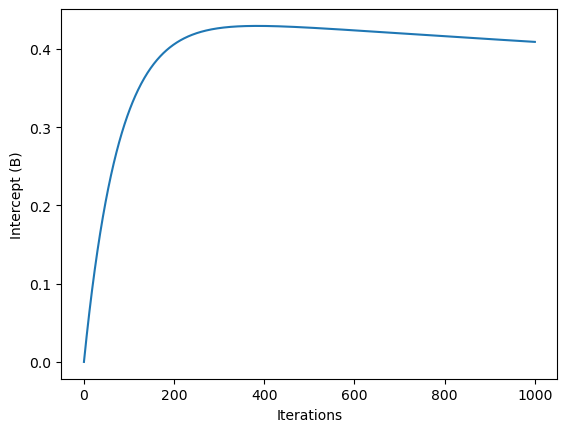

In [ ]:
# Plot the saved values of B against the iteration
plt.plot(range(N+1), B)
plt.xlabel('Iterations')
plt.ylabel('Intercept (B)')
plt.show()


In [ ]:
# Define the final values (optimal values) of w and b
w_opt = W[-1]
b_opt = B[-1]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)


The optimal value for w: 0.3151275288102338
The optimal value for b: 0.40912148973560813


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

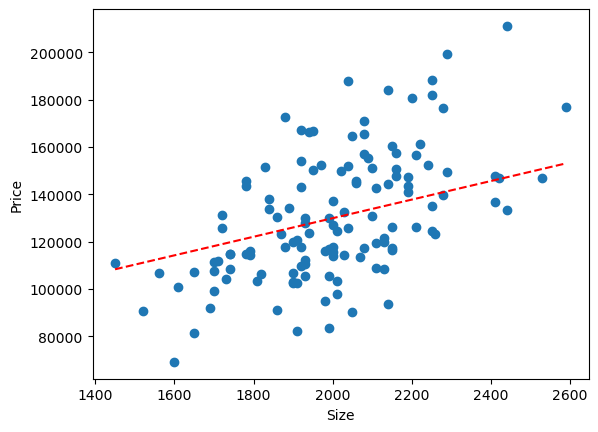

In [ ]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [ ]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [ ]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.27730447332899677


If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

Good Luck!

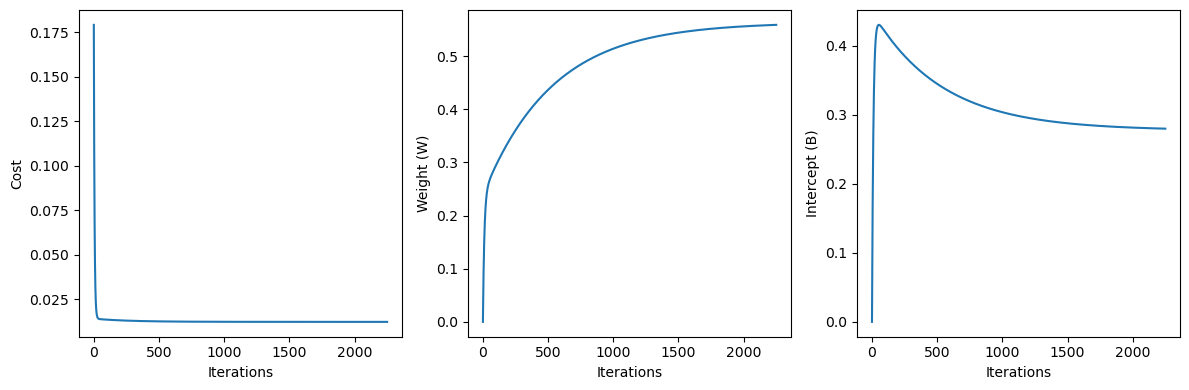

Scikit-learn model:
Coefficient (w): 0.5633919971631888
Intercept (b): 0.27730447332899677
Gradient Descent model:
Optimal value for w: 0.5586566840444481
Optimal value for b: 0.2798187364352521


In [ ]:

# Function to define the linear regression model
def LR_model(x, w, b):
    return w * x + b

# Function to compute the cost (mean squared error)
def cost(X, Y, w, b):
    m = len(X)
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_pred = LR_model(x, w, b)
        J += (y_pred - y)**2
    
    J = J / (2 * m)
    
    return J

# Function to perform a gradient descent step
def grad_descent_step(X, Y, w, b, alpha):
    m = len(X)
    sum_w = 0
    sum_b = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_pred = LR_model(x, w, b)
        sum_w += (y_pred - y) * x
        sum_b += (y_pred - y)
    
    w_new = w - (alpha / m) * sum_w
    b_new = b - (alpha / m) * sum_b 
    
    return w_new, b_new

# Select the size and price values from the dataset
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

# Normalize the data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat))

# Choose an initial value for w
w_init = 0.0

# Choose an initial value for b
b_init = 0.0

# Choose the learning rate
alpha = 0.07

# Choose the number of iterations
N = 2250

# Save the values for w, b, and cost
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alpha)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for the new values of w and b 
    C[n+1] = cost(X, Y, w_new, b_new)

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(N+1), C)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(1, 3, 2)
plt.plot(range(N+1), W)
plt.xlabel('Iterations')
plt.ylabel('Weight (W)')

plt.subplot(1, 3, 3)
plt.plot(range(N+1), B)
plt.xlabel('Iterations')
plt.ylabel('Intercept (B)')

plt.tight_layout()
plt.show()

# Compare with Scikit-learn
reg = LinearRegression().fit(X.reshape(-1, 1), Y)

# Print the coefficients obtained from Scikit-learn
print("Scikit-learn model:")
print("Coefficient (w):", reg.coef_[0])
print("Intercept (b):", reg.intercept_)

# Print the optimal values obtained from Gradient Descent
w_opt = W[-1]
b_opt = B[-1]
print("Gradient Descent model:")
print("Optimal value for w:", w_opt)
print("Optimal value for b:", b_opt)


## Linear Regression Model

##  Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

## Implementing Linear Regression for NAC Dataset

This is a template for the DataLab day on Tuesday of Week 8. 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this task is to build a linear regression model for the NAC dataset. 

It is your own responsibilty to choose the predictors (features) and the response variable.

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the NAC dataset
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
football_data = pd.read_csv(file_path)

# Decide about the features and the response variable
X = df.drop(['xA', 'Assists'], axis=1)  # Exclude non-numeric columns

# Drop non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X = X[numeric_columns]

# Normalize your data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Your response variable (adjust column name as needed)
y = df['Market value']


In [ ]:
column_names = df.columns
print(column_names)



Index(['Player', 'Team', 'Team within selected timeframe', 'Position', 'Age',
       'Market value', 'Contract expires', 'Matches played', 'Minutes played',
       'Goals',
       ...
       'Prevented goals per 90', 'Back passes received as GK per 90',
       'Exits per 90', 'Aerial duels per 90.1', 'Free kicks per 90',
       'Direct free kicks per 90', 'Direct free kicks on target, %',
       'Corners per 90', 'Penalties taken', 'Penalty conversion, %'],
      dtype='object', length=114)


In [ ]:
# Load the NAC dataset
file_path = r'C:\Users\jimal\OneDrive - BUas\Desktop\2023-24b-fai1-adsai-MusaedMusaedSadeqMusaedAl-Fareh225739\Data lab\GitHub\DataLabPreparation\output_combined.csv'
football_data = pd.read_csv(file_path)

# Select features and response variable
X = football_data[['xG', 'Goals']].to_numpy()
Y = football_data[['Market value']].to_numpy()

# Normalize features using min-max scaling
X = (np.max(X, axis=0) - X) / (np.max(X, axis=0) - np.min(X, axis=0))

# Normalize response variable using min-max scaling
Y = (np.max(Y, axis=0) - Y) / (np.max(Y, axis=0) - np.min(Y, axis=0))


### Imprtant Note

To use this template for building your model, X should be a two-dimensional numpy array, and Y should be a one-dimensional numpy array. 

In [ ]:
# Define the number of observations and the features (predictors)
# m denotes the number of observations
m = X.shape[0]

# p denotes the number of features
p = X.shape[1]

You have to add 1 to the related row for each observation; i.e. we need to change X to the following form:

$$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$$

In [ ]:
# Put your code here (1 line of code)
# Add 1 to each row of X (you can use np.insert)
X = np.insert(X, 0, 1, axis=1)


To proceed further, you need to increase the dimension of Y from 1 to 2 in the following cell:

In [ ]:
Y = Y.reshape(-1, 1)
print(Y)


[[0.98333333]
 [0.98333333]
 [0.98333333]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


Use **np.random.seed** to set the seed for the NumPy pseudo-random number generator. The pseudo-random number generator produces sequences of numbers that appear random, but they are actually determined by an initial seed value. By setting the seed, you ensure that you get reproducible results when generating random numbers. Don't change the seed number in the following cell.

In [ ]:
np.random.seed(1979)

### Initilize Parameters

Initialize the model parameters with random values. Write a function to initialize the parameters with random values. Note that, due to having an intercept in the linear regression model, the number of parameters should be $p+1$.

In [ ]:
def Init_param(p):
    # p (scalar): number of parameters
    
    # Output:
    # W: 1-dimensional numpy array
    
    # Use np.random.rand to initialize the parameters
    # Note that W should have p+1 parameters
    W = np.random.rand(p + 1)
    
    return W


Now, let's check your **Init_param** function. Run the followng cell:

In [ ]:
Init_param(3)

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

The expected value is as follows:

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

### Define Linear Regression Model

In this section, you will define your linear regression model. The model is as follows:

$$y = xW$$

In [ ]:
def LR_model(x, W):
    # x: 1-dimensional numpy array containing the features (predictors)
    # W: 1-dimensional numpy array containing the weights of the model
    
    # Add a bias term to x
    x = np.insert(x, 0, 1)
    W = np.expand_dims(W, axis=1)
    
    # Implement the linear regression model
    y = np.dot(x, W)
    
    return y


Now, let's check **LR_model** that you have already implemented. Run the following cell:

In [ ]:
w = np.array([0.8, 0.7 , -0.5 , 0.3])
x = np.array([0.33,    0.5,    0.7])
LR_model(x, w)

array([0.991])

The expected output is: **array([0.991])**

### Compute Cost Function

In this section, you are supposed to write a function to calculate the cost function. It is better to implement the vectorized form. Actually, you need to implement the following cost function:

$$J(W)=\dfrac{1}{2m}(XW-Y)^\top(XW-Y)$$

In [ ]:
def cost_fun(X, Y, W):
    # X: a 2-dimensional numpy array containing all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containing the weights of the model
    
    # Define the number of observations
    m = X.shape[0]
    
    # Expand the dimension to be able to perform the matrix multiplication
    W = np.expand_dims(W, axis=1)
    
    # Define the cost function using the vectorized form
    J = (1/(2*m)) * np.dot((np.dot(X, W) - Y).T, (np.dot(X, W) - Y))
    
    return np.squeeze(J)


Now, let's check your already developed **cost_fun** function by running the following cell. Compare your result with the expected value. 

In [ ]:
X1 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y1 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])
          
W1 = np.array([3, 2, -1, 5])
cost_fun(X1,Y1,W1)

array(31.5747073)

The expected value is: **array(31.5747073)**

### Gradient Descent Update Rule

Now, you can implement Gradient Descent update rule utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W - \alpha \dfrac{1}{m}X^\top(XW-Y)$$

In [ ]:
def grad_descent_step(X, Y, W, alpha):
    # X: a 2-dimensional numpy array containing all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containing the weights of the model
    # alpha: learning rate
    
    # Define the number of observations
    m = X.shape[0]
    
    # Add one dimension to make the matrix multiplication possible
    W = np.expand_dims(W, axis=1)
    
    # Implement the update rule
    W_new = W - alpha * (1/m) * np.dot(X.T, (np.dot(X, W) - Y))
    
    return np.squeeze(W_new)


Now, let's check the **grad_descent_step** function. Run the following cell and compare the obtained result with the expected one.

In [ ]:
X2 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
               [1.        , 0.49122807, 0.33333333, 1.        ],
               [1.        , 0.74561404, 0.66666667, 1.        ]])

Y2 = np.array([[0.68191414],
               [0.68261787],
               [0.6783955 ]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step(X2, Y2, W2, alpha=0.001)


array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])

The expected value is as follows:

**array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])**

### Implement Gradient Descent Algorithm

Now, it is time to put together all the previously developed functions to build a linear regression model from scratch.

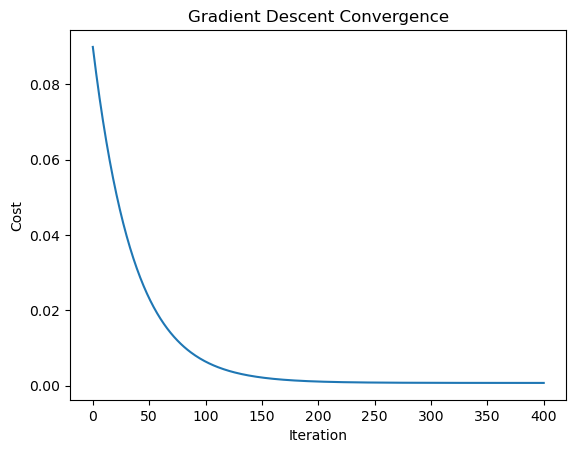

In [ ]:
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Choose the learning rate
alpha = 0.005

# Choose the number of iterations
N = 400

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))
COST = np.zeros(N + 1)

# Save initial values
W[:,0] = np.squeeze(w_init)
COST[0] = cost_fun(X, Y, w_init)

# This is a for loop to implement the Gradient Descent algorithm
for n in range(N):
    # Use grad_descent_step to update the values for w
    w_new = grad_descent_step(X, Y, W[:, n], alpha)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Save the cost value for newly obtained w using the cost_fun
    COST[n+1] = cost_fun(X, Y, w_new)

# Plot the results
plt.plot(range(N+1), COST)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()


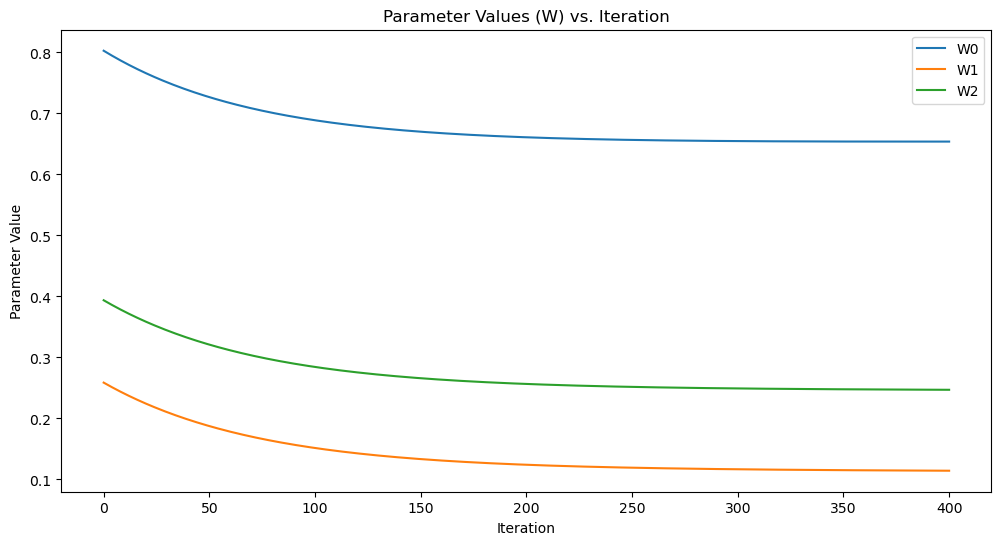

In [ ]:
# Illustrate W against iteration in this cell
# Plot the values of parameters (W) against iteration
plt.figure(figsize=(12, 6))

for i in range(p + 1):
    plt.plot(range(N + 1), W[i, :], label=f'W{i}')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values (W) vs. Iteration')
plt.legend()
plt.show()


## Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch for the NAC dataset. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

In [ ]:
reg.coef_

array([[0.        , 0.01633778, 0.02736417]])

In [ ]:
reg.intercept_

array([0.95079676])

Note that in our model intercep value is saved in **W[0, :]**. 

If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.
Good Luck!